# ТелеДом: Прогноз оттока клиентов

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. 

**Задача** — обучить на этих данных модель для прогноза оттока клиентов.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 
* Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
* Интернет. Подключение может быть двух типов: через телефонную линию (`DSL`, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (`Fiber optic`).

Также доступны такие услуги:
* Интернет-безопасность: антивирус (`DeviceProtection`) и блокировка небезопасных сайтов (`OnlineSecurity`);
* Выделенная линия технической поддержки (`TechSupport`);
* Облачное хранилище файлов для резервного копирования данных (`OnlineBackup`);
* Стриминговое телевидение (`StreamingTV`) и каталог фильмов (`StreamingMovies`).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

**Описание данных** 

Данные состоят из нескольких файлов, полученных из разных источников:
`contract_new.csv` — информация о договоре;
`personal_new.csv` — персональные данные клиента;
`internet_new.csv` — информация об интернет-услугах;
`phone_new.csv` — информация об услугах телефонии.

Файл `contract_new.csv`

* **customerID** — идентификатор абонента;
* **BeginDate** — дата начала действия договора;
* **EndDate** — дата окончания действия договора;
* **Type** — тип оплаты: раз в год-два или ежемесячно;
* **PaperlessBilling** — электронный расчётный лист;
* **PaymentMethod** — тип платежа;
* **MonthlyCharges** — расходы за месяц;
* **TotalCharges** — общие расходы абонента.

Файл `personal_new.csv`

* **customerID** — идентификатор пользователя;
* **gender** — пол;
* **SeniorCitizen** — является ли абонент пенсионером;
* **Partner** — есть ли у абонента супруг или супруга;
* **Dependents** — есть ли у абонента дети.

Файл `internet_new.csv`

* **customerID** — идентификатор пользователя;
* **InternetService** — тип подключения;
* **OnlineSecurity** — блокировка опасных сайтов;
* **OnlineBackup** — облачное хранилище файлов для резервного копирования данных;
* **DeviceProtection** — антивирус;
* **TechSupport** — выделенная линия технической поддержки;
* **StreamingTV** — стриминговое телевидение;
* **StreamingMovies** — каталог фильмов.

Файл `phone_new.csv`

* **customerID** — идентификатор пользователя;
* **MultipleLines** — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец `customerID` содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

**План работы:**

1. **Установка и импорт библиотек**
   - Установить необходимые библиотеки
   - Импортировать библиотеки
   - Определить используемые функции

2. **Загрузка и первичная обработка данных**
   - Загрузить данные из CSV-файлов
   - Проверить соответствие данных описанию


3. **Исследовательский анализ и предобработка данных**
   - Преобразовать столбцы в соответствующие форматы
   - Построить графики и вывести описательную статистику для каждого датафрейма
   - Сделать выводы по результатам анализа и предобработки данных


4. **Объединение данных**


5. **Исследовательский анализ и предобработка данных объединённого датафрейма**
   - Посмотреть общую информацию об объединённом датафрейме
   - Проверить структуры и содержания данных в объединённом датафрейме
   - Обработать пропущенные значения при необходимости
   - Создать целевой признак - клиент разорвал контракт (target)
   - Создать новые признаки
   - Удалить неактуальные признаки
   - Визуализировать распределения параметров объединённого датафрейма
   - Phik-матрица корреляции


6. **Подготовка данных**
   - Разделить данные на обучающую и тестовую выборки
   - Создать пайплайны для преобразования признаков
     - Пайплайны для бинарного и порядкового кодирования категориальных признаков
     - Пайплайн для масштабирования числовых признаков
   - Создать общие пайплайны для предобработки данных


7. **Обучение моделей машинного обучения**
   - Обучить модели:
     - Логистическая регрессия
     - Дерево решений
     - Случайный лес
     - Градиентный бустинг
     - CatBoost
     - DummyClassifier

8. **Выбор лучшей модели**
   - Сравнить результаты моделей по метрике ROC-AUC и времени обучения
   - Оценить качество на тестовых данных для выбранной модели
     - матрица ошибок
     - ROC-кривая
     

9. **Итоговый вывод**
   - основные этапы
   - полученные результаты
   - рекомендации для бизнеса

### Установим необходимые библиотеки

In [1]:
!pip install -U -q numba

In [2]:
!pip install -q numpy==1.23

In [3]:
!pip install -q phik

In [4]:
!pip install -U -q scikit-learn

In [5]:
!pip install -U -q catboost

In [6]:
!pip install -q shap 

### Импортируем необходимые библиотеки

In [7]:
# Импортируем библиотеки
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik import resources, report
from phik.binning import bin_data
from phik.report import plot_correlation_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score, 
    roc_curve,
    confusion_matrix
)
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import (
    train_test_split, 
    RandomizedSearchCV,
    cross_val_score
)
from catboost import CatBoostClassifier
import time
import shap

# задаём значение констант
RANDOM_STATE = 20924 
TEST_SIZE = 0.25 

# задаём стиль для графиков
sns.set_style("darkgrid")

### Используемые в проекте функции

In [8]:
def rename_columns(df):
    '''
    Функция для переименования колонок.
    Функция rename_columns принимает на вход DataFrame df и переименовывает колонки,
    добавляя символ '_' перед новыми словами, начинающимися с заглавной буквы, и переводя все буквы в нижний регистр.

    Parameters:
    df (DataFrame): Исходный DataFrame, в котором требуется переименовать колонки.

    Returns:
    DataFrame: DataFrame с переименованными колонками.
    '''
    def rename_column(col):
        # Преобразование имени колонки
        new_col = re.sub(r'([a-z])([A-Z])', r'\1_\2', col)  # Добавить '_' перед новыми словами
        new_col = new_col.lower()  # Преобразовать в нижний регистр
        return new_col
    df.columns = [rename_column(col) for col in df.columns]
    return df

In [9]:
def info_func(df, dis_columns=None):
    '''
    Функция для просмотра характеристик датафреймов,
    проверки наличия пропусков и дубликатов в данных.
    Функция info_func принимает на вход DataFrame df и выводит первые несколько строк 
    этого DataFrame, а также общую информацию о нем, количество пустых значений
    и количество явных дубликатов в этом DataFrame.

    Parameters:
    df (DataFrame): Исходный DataFrame, для которого требуется вывести информацию.
    dis_columns (list): Список дискретных (категориальных) столбцов. По умолчанию None.

    Returns:
    None: Функция не возвращает значений, она лишь выводит информацию о DataFrame.
    '''
    print('-'*22, 'Исходный датафрейм', df.name, '-'*22)
    display(df.head())
    print('')
    print('')
    print('-'*12, 'Общая информация о датафрейме', df.name, '-'*12)
    print('')
    print('')
    display(df.info())
    
    print('-'*10, 'Количество пустых значений в датафрейме', df.name, '-'*10)
    print('')
    print('')
    display(df.isna().sum())
    print('-'*10, 'Количество явных дубликатов в датафрейме', df.name, '-'*10)
    display(df.duplicated().sum())

In [10]:
def visualize_data(df, cat_cols, num_cols=None):
    '''
    Функция для визуализации категориальных и числовых признаков в DataFrame.

    Функция visualize_data принимает на вход DataFrame df и список категориальных столбцов cat_cols, 
    а также необязательный список числовых столбцов num_cols. Она создает визуализации распределения 
    категориальных признаков в виде круговых диаграмм и числовых признаков в виде гистограмм с плотностью 
    распределения и диаграмм размаха. 

    Parameters:
    df (DataFrame): Исходный DataFrame, для которого требуется выполнить визуализацию.
    cat_cols (list): Список категориальных столбцов для визуализации.
    num_cols (list): Список числовых столбцов для визуализации. По умолчанию None.

    Returns:
    None: Функция не возвращает значений, она лишь отображает графики и выводит описательную статистику.
    '''
    # Визуализация категориальных признаков в 2 столбца
    num_cat = len(cat_cols)
    num_rows = (num_cat + 1) // 2  # вычисляем количество строк (округляем вверх)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 6 * num_rows))
    axes = axes.flatten()  # преобразуем в одномерный массив для удобства работы

    colors = ['#AB78B4', '#D4B9D3', '#C19ABE', '#AE7AAA']  
    
    for i, col in enumerate(cat_cols):
        df[col].dropna().value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                                 colors=colors, ax=axes[i])
        axes[i].set_title(f"Распределение по {col}")
        axes[i].set_ylabel('')
    
    # Если категориальных признаков нечётное количество, удаляем последний пустой график
    if num_cat % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()
    
    color = '#AB78B4' 
    
    # Визуализация числовых признаков
    if num_cols:
        for col in num_cols:
            fig = plt.figure(figsize=(12, 10))
            grid = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[8, 2])

            # Преобразование данных для timedelta64 и datetime64
            if pd.api.types.is_timedelta64_dtype(df[col]):
                data = df[col].dropna().dt.days  # Конвертируем timedelta в дни
                xlabel = f'{col} (дни)'
            elif pd.api.types.is_datetime64_dtype(df[col]):
                data = df[col].dropna()
                xlabel = f'{col} (дата)'
            else:
                data = df[col].dropna()
                xlabel = col

            # Гистограмма с плотностью распределения
            ax1 = fig.add_subplot(grid[0])
            sns.histplot(data, bins=100, kde=True, ax=ax1, color='purple')
            ax1.set_title(f'Распределение {col}')
            ax1.set_xlabel(xlabel)
            ax1.set_ylabel('Частота')

            # Диаграмма размаха (boxplot)
            ax2 = fig.add_subplot(grid[1])
            sns.boxplot(x=data, ax=ax2, hue=None, color=color)
            ax2.set_title(f'Диаграмма размаха {col}')
            ax2.set_xlabel(xlabel)

            plt.tight_layout()
            plt.show()
            
    # Описательная статистика для числовых признаков
    print(f"\nОписательная статистика:")
    display(df.describe().T)

In [11]:
def visualize_categorical(df, cat_cols, target_col):
    '''
    Функция для визуализации распределения категориальных признаков по целевой переменной.

    Эта функция создает графики распределения категориальных признаков в разрезе целевой переменной.
    Графики показывают долю каждой категории в зависимости от значения целевой переменной.

    Parameters:
    merged_df (DataFrame): Исходный DataFrame, содержащий данные для визуализации.
    cat_cols (list): Список категориальных признаков для анализа.
    target_col (str): Название столбца, содержащего целевую переменную.

    Returns:
    None: Функция отображает графики и не возвращает значений.
    '''
    cat_cols = cat_cols[:-1]
    # Устанавливаем размеры графиков
    plt.figure(figsize=(10, len(cat_cols) * 3)) 
    
    # Цвета для графиков
    colors = ['#AB78B4', '#8A9EB7']  
    
    # Анализ категориальных признаков
    for i, column in enumerate(cat_cols):
        plt.subplot(len(cat_cols) // 2 + 1, 2, i + 1) 
        counts = df.groupby(column)[target_col].value_counts(normalize=True).unstack()
        counts.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors)
        plt.title(column)
        plt.ylabel('Доля')
        plt.xticks(rotation=30)
    
    plt.tight_layout()  
    plt.show()

In [12]:
def visualize_numerical(df, num_cols, target):
    '''
    Функция для визуализации распределения числовых признаков.

    Эта функция создаёт графики распределения числовых признаков, включая гистограмму с плотностью распределения 
    и диаграмму размаха (boxplot). Гистограмма показывает частоту значений, а диаграмма размаха — разброс значений 
    и наличие выбросов.

    Parameters:
    df (DataFrame): Исходный DataFrame, содержащий данные для визуализации.
    num_cols (list): Список числовых признаков для анализа.
    target (str): Название целевого признака для разделения графиков.

    Returns:
    None: Функция отображает графики и не возвращает значений.
    '''
    for col in num_cols:
        # Создаем фигуру и сетку для графиков
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]})

        # Гистограмма с плотностью распределения
        sns.histplot(data=df, x=col, hue=target, bins=100, kde=True, ax=ax1, palette='Purples_r')
        ax1.set_title(f'Распределение {col}')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Частота')

        # Диаграмма размаха (boxplot)
        sns.boxplot(data=df, x=df[col], hue=target, ax=ax2, palette='Purples_r')
        ax2.set_title(f'Диаграмма размаха {col}')
        ax2.set_xlabel(target)
        ax2.set_ylabel(col)

        plt.tight_layout()
        plt.show()

## Загрузка данных

### Загрузим данные

Считаем CSV-файлы в датафреймы:

In [13]:
local_path = './datasets/'
online_path = 'https://code.xxx.net/datasets/'

files = [
    'contract_new.csv',
    'personal_new.csv',
    'internet_new.csv',
    'phone_new.csv'
]

dfs = []

# Чтение файлов и создание датафреймов
for file_name in files:
    local_file_path = local_path + file_name
    online_file_path = online_path + file_name
    try:
        if os.path.exists(local_file_path):
            df = pd.read_csv(local_file_path)
            print(f"Данные загружены из локальной директории: {file_name}")
        else:
            df = pd.read_csv(online_file_path)
            print(f"Данные загружены из сети: {file_name}")

        # Получение имени датафрейма из имени файла
        df_name = file_name.split('.')[0]
        # Присвоение датафрейму имени    
        globals()[df_name] = df  
        df.name = df_name
        # Добавление датафрейма в список dfs   
        dfs.append(df)           
    except Exception as e:
        print(f"Произошла ошибка при чтении файла {file_name}: {e}")

Данные загружены из локальной директории: contract_new.csv
Данные загружены из локальной директории: personal_new.csv
Данные загружены из локальной директории: internet_new.csv
Данные загружены из локальной директории: phone_new.csv


### Переименуем столбцы в соответствии с рекомендациями PEP 8

In [14]:
# Переименуем колонки
for df in dfs:
    df = rename_columns(df)

In [15]:
# Выведем список колонок
for df in dfs:
    print(df.columns.tolist())

['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']
['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']
['customer_id', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
['customer_id', 'multiple_lines']


### Проверим соответствие данных описанию

Применим к датафреймам функцию `info_func`:

In [16]:
for df in dfs:
    info_func(df)

---------------------- Исходный датафрейм contract_new ----------------------


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5




------------ Общая информация о датафрейме contract_new ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

---------- Количество пустых значений в датафрейме contract_new ----------




customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64

---------- Количество явных дубликатов в датафрейме contract_new ----------


0

---------------------- Исходный датафрейм personal_new ----------------------


,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No




------------ Общая информация о датафрейме personal_new ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

---------- Количество пустых значений в датафрейме personal_new ----------




customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

---------- Количество явных дубликатов в датафрейме personal_new ----------


0

---------------------- Исходный датафрейм internet_new ----------------------


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No




------------ Общая информация о датафрейме internet_new ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

---------- Количество пустых значений в датафрейме internet_new ----------




customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

---------- Количество явных дубликатов в датафрейме internet_new ----------


0

---------------------- Исходный датафрейм phone_new ----------------------


,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes




------------ Общая информация о датафрейме phone_new ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

---------- Количество пустых значений в датафрейме phone_new ----------




customer_id       0
multiple_lines    0
dtype: int64

---------- Количество явных дубликатов в датафрейме phone_new ----------


0

**Вывод**

- Датафреймы содержат:
 - `contract_new` — 7043 строки
 - `personal_new` — 7043 строки
 - `internet_new` — 5517 строк
 - `phone_new` — 6361 строк
- Все данные корректно загружены и содержат необходимую информацию для анализа.
- Нет пустых значений или явных дубликатов в датафреймах.
- В столбце `total_charges` датафрейма `contract_new` требуется преобразование из строки в числовой тип данных для корректного анализа.
- В столбцах `begin_date` и `end_date` датафрейма `contract_new` требуется преобразование из строки в тип данных `datetime` для корректного анализа.
- Столбцы в датафреймах переименованы в соответствии с рекомендациями PEP 8. Теперь они используют латинские буквы и стиль "змеиный регистр" (snake_case).

## Исследовательский анализ и предобработка данных

### Преобразуем столбец `total_charges` в числовой формат

In [17]:
contract_new['total_charges'] = pd.to_numeric(
    contract_new['total_charges'],
    errors='coerce')

### Преобразуем столбцы в формат datetime

In [18]:
contract_new['begin_date'] = pd.to_datetime(
    contract_new['begin_date'], format='%Y-%m-%d')
contract_new['end_date'] = pd.to_datetime(
    contract_new['end_date'], format='%Y-%m-%d', errors='coerce')

Проверим форматы данных:

In [19]:
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


### Построим графики для наших датасетов и выведем описательную статистику для числовых признаков

####  `contract_new`

In [20]:
# Получение числовых и категориальных столбцов
num_cols = contract_new.select_dtypes(include=np.number).columns.tolist()
cat_cols = contract_new.drop(
    ['customer_id'], axis=1).select_dtypes(include='object').columns.tolist()

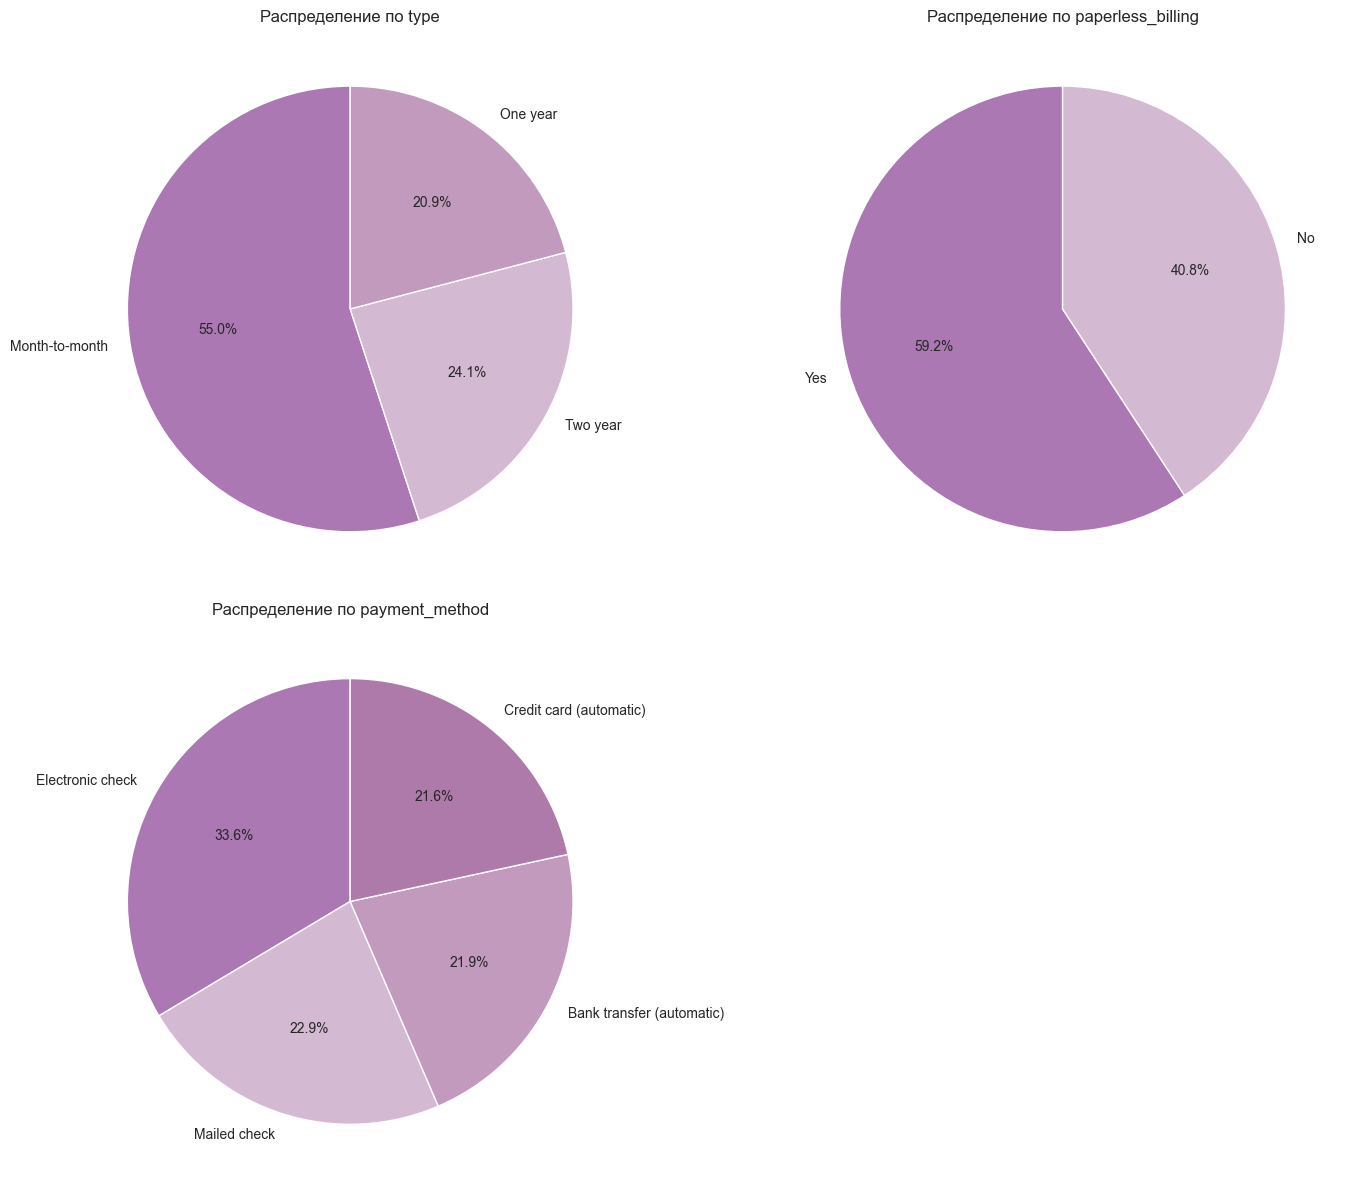

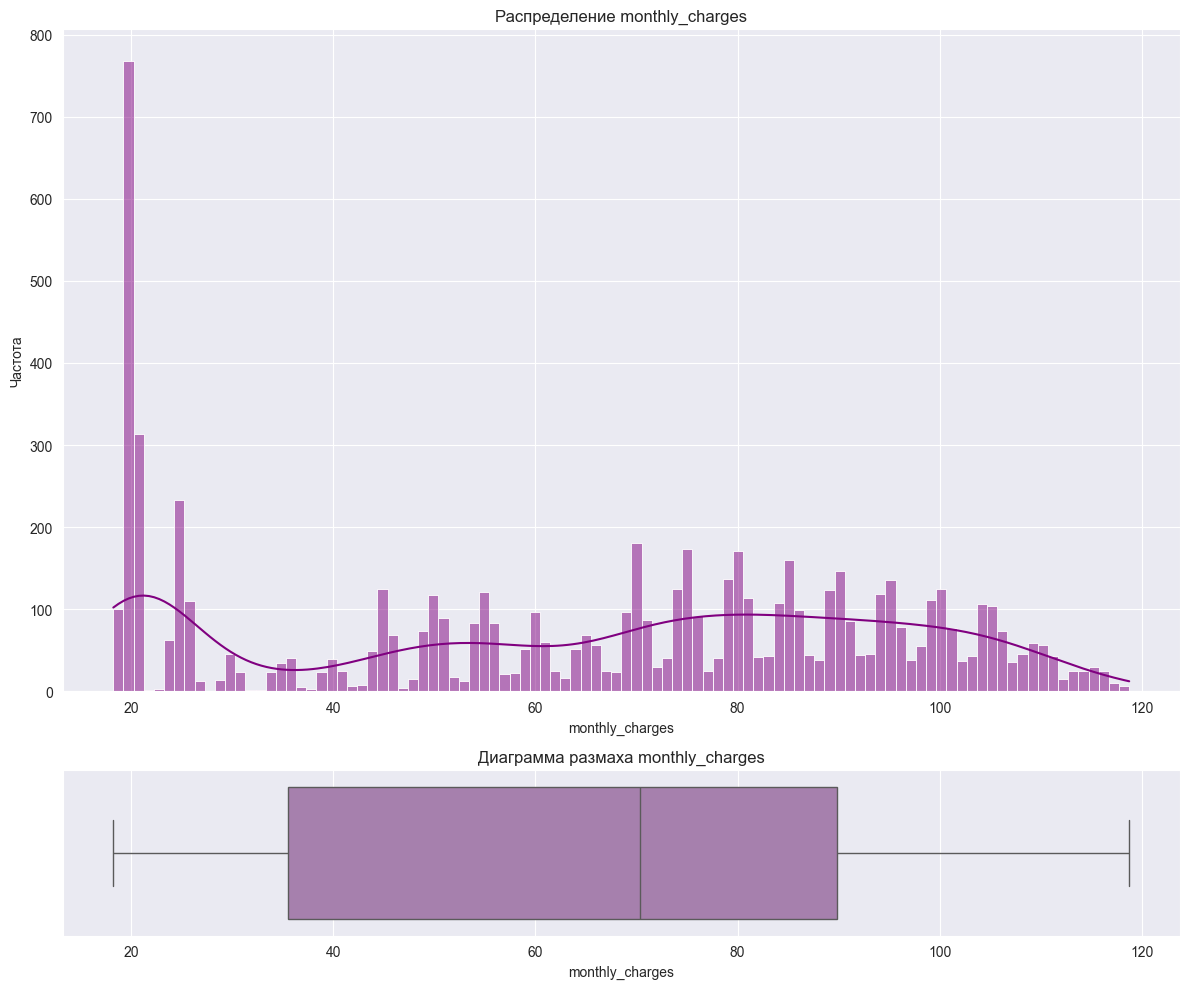

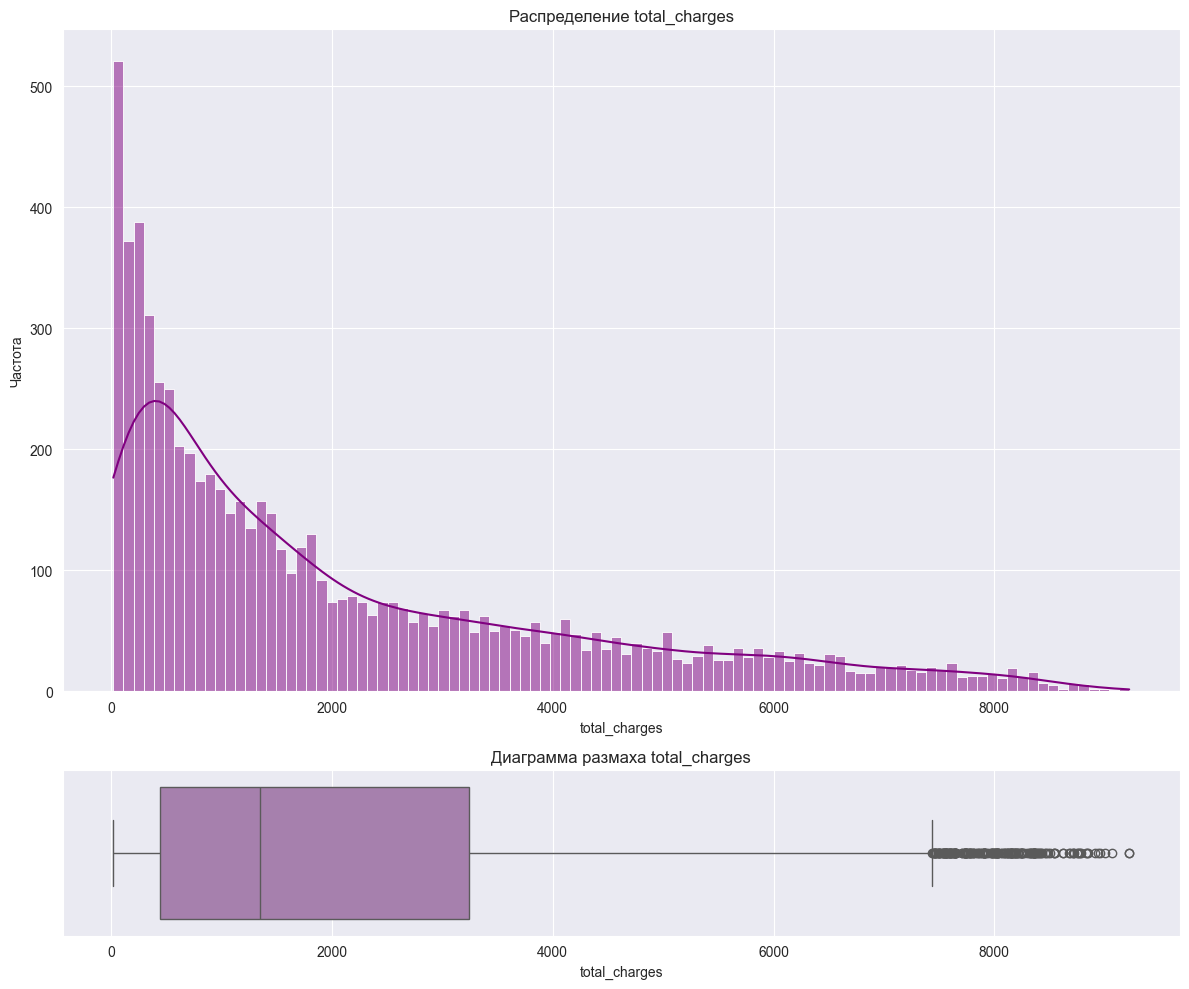


Описательная статистика:


,count,mean,min,25%,50%,75%,max,std
begin_date,7043,2017-04-30 13:01:50.918642688,2013-10-01 00:00:00,2015-06-01 00:00:00,2017-09-01 00:00:00,2019-04-01 00:00:00,2020-02-01 00:00:00,NaN
end_date,1101,2018-03-12 18:21:15.204359680,2014-06-01 00:00:00,2017-05-01 00:00:00,2018-06-01 00:00:00,2019-04-01 00:00:00,2020-01-01 00:00:00,NaN
monthly_charges,7043.0,64.761692,18.25,35.5,70.35,89.85,118.75,30.090047
total_charges,7032.0,2118.621822,19.05,439.745,1345.275,3239.3175,9221.38,2112.736199


In [21]:
visualize_data(contract_new.drop(['customer_id'], axis=1),
               cat_cols, num_cols)

* `type`
   - **Распределение:** `Month-to-month` (55%), `Two year` (24%), `One year` (21%)
   - Признак `type` представляет тип контракта, что может быть полезно для модели, так как длительность контракта может влиять на вероятность ухода клиента.

* `paperless_billing`
   - **Распределение:** `Yes` (59%), `No` (41%)
   - Признак `paperless_billing` может быть полезен, так как наличие электронных счетов может быть связано с уровнем удовлетворенности клиентов или удобством.

* `payment_method`
   - **Распределение:** 
     - `Electronic check` (34%)
     - `Mailed check` (23%)
     - `Bank transfer (automatic)` (22%)
     - `Credit card (automatic)` (22%)
   - Признак `payment_method` может иметь значение, так как способ оплаты может влиять на поведение клиента и его удержание.

* `begin_date` и `end_date`
   - Эти признаки представляют собой даты и требуют преобразования в числовые для анализа. Они могут быть полезны для оценки продолжительности отношений с клиентом или сезонных эффектов. С их помощью можно создать новый признак, такой как длительность контракта.

* `monthly_charges` и `total_charges`
   - **Распределение:** 
     - `monthly_charges`: Среднее 64.76, стандартное отклонение 30.09
     - `total_charges`: Среднее 2118.62, стандартное отклонение 2112.74
   - Оба признака являются числовыми и важными для анализа, так как они напрямую связаны с финансовыми аспектами клиента.

####  `personal_new`

In [22]:
# Зададим категориальные столбцы
cat_cols = ['gender', 'senior_citizen', 'partner', 'dependents']

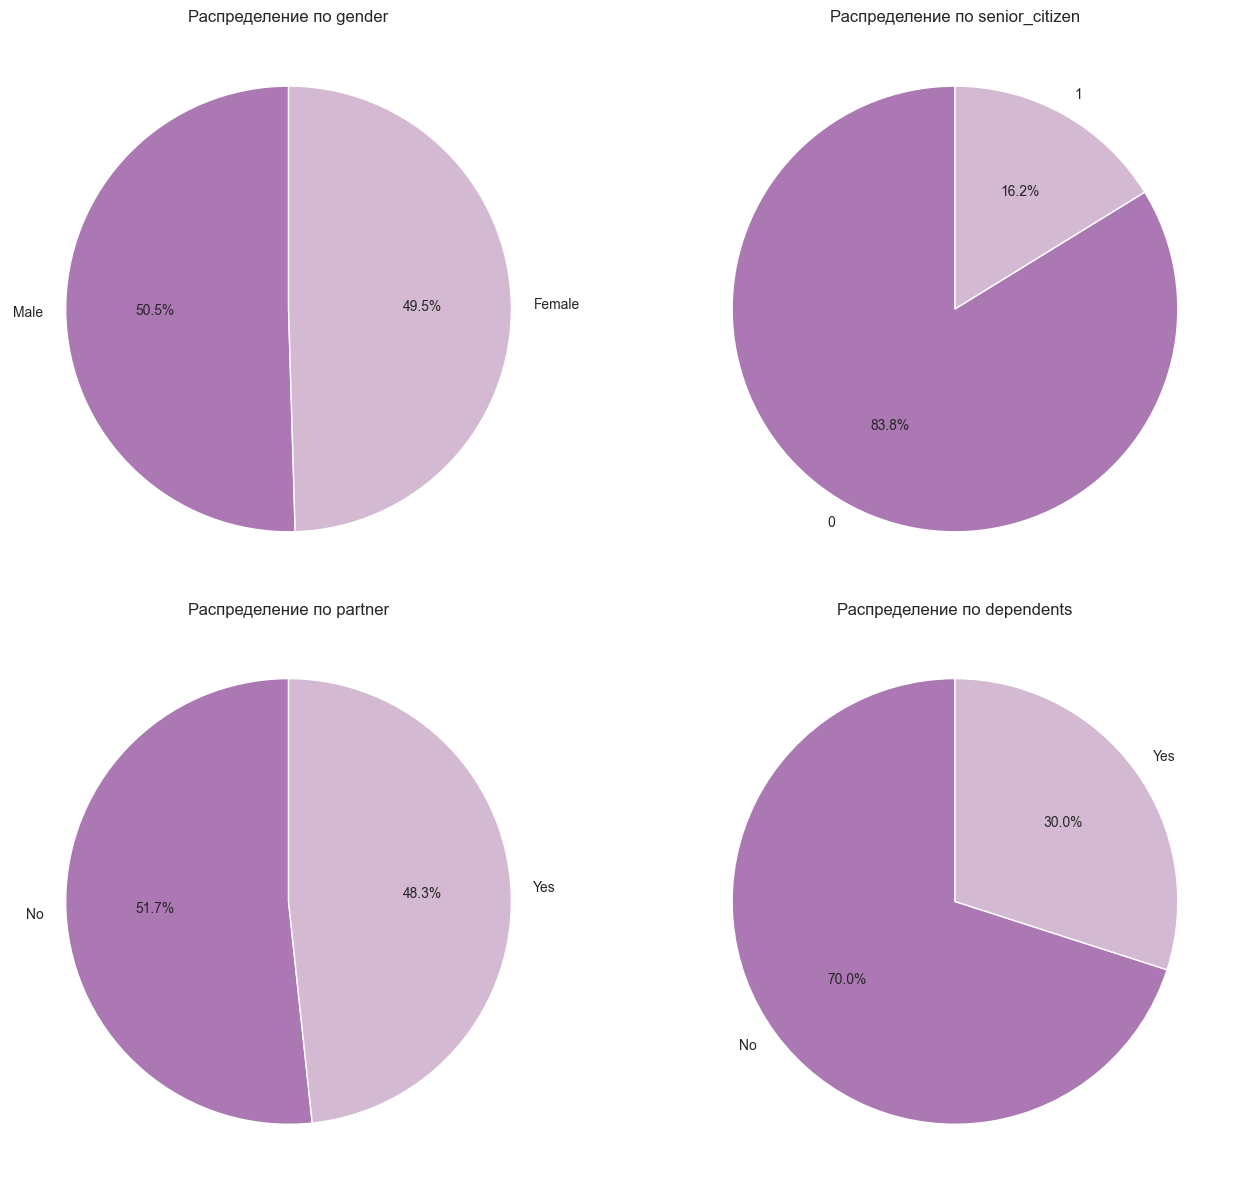


Описательная статистика:


,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0


In [23]:
visualize_data(personal_new.drop('customer_id', axis=1),
              cat_cols)

* `gender`
   - **Распределение:** `Male` (50.5%), `Female` (49.5%)
   - Признак `gender` может иметь влияние на поведение клиентов и может быть полезен для обучения модели.

* `senior_citizen`
   - **Распределение:** `0` (84%), `1` (16%)
   - Признак `senior_citizen` явно демонстрирует, что большинство клиентов не являются пенсионерами, но этот признак может быть важен для анализа демографических характеристик.

* `partner`
   - **Распределение:** `No` (52%), `Yes` (48%)
   - Признак `partner` может быть полезен, так как наличие партнера может влиять на финансовое поведение клиента.

* `dependents`
   - **Распределение:** `No` (70%), `Yes` (30%)
   - Признак `dependents` может также влиять на финансовые решения клиента и его поведение.

####  `internet_new`

In [24]:
# Получение категориальных столбцов
cat_cols = internet_new.drop(
    ['customer_id'], axis=1).select_dtypes(include='object').columns.tolist()

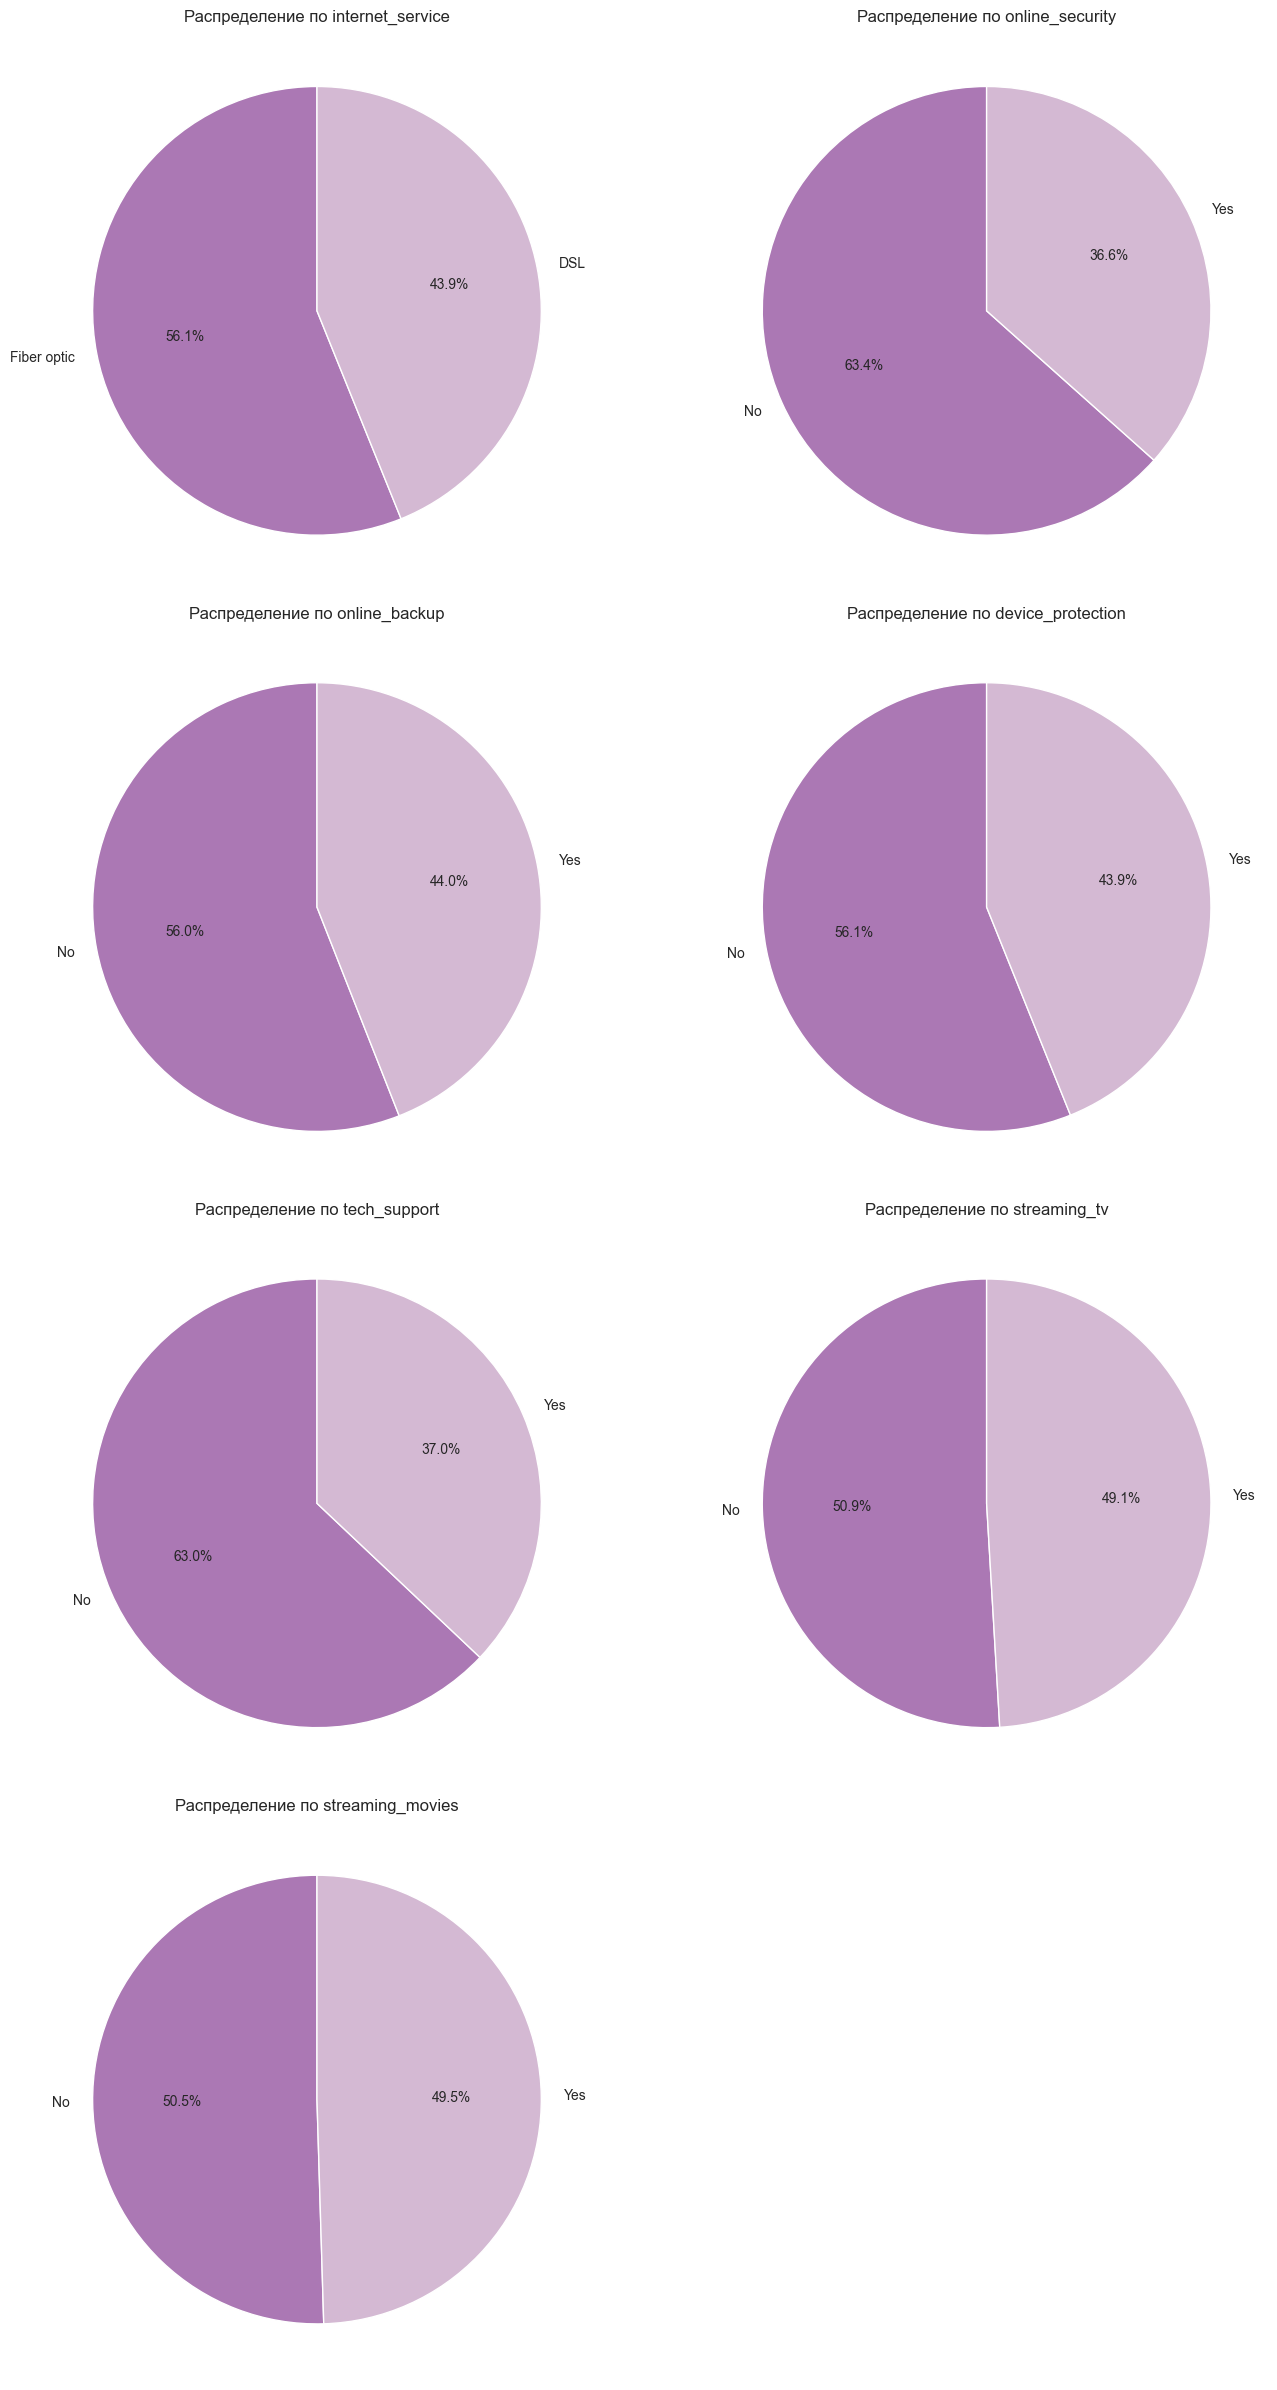


Описательная статистика:


,count,unique,top,freq
internet_service,5517,2,Fiber optic,3096
online_security,5517,2,No,3498
online_backup,5517,2,No,3088
device_protection,5517,2,No,3095
tech_support,5517,2,No,3473
streaming_tv,5517,2,No,2810
streaming_movies,5517,2,No,2785


In [25]:
visualize_data(internet_new.drop('customer_id', axis=1),
              cat_cols)

* `internet_service`
   - **Распределение:** `Fiber optic` (56%), `DSL` (44%)
   - Признак `internet_service` важен, так как тип интернет-сервиса может влиять на клиентский опыт и уровень удовлетворенности.

* `online_security`
   - **Распределение:** `No` (63%), `Yes` (37%)
   - Признак `online_security` может быть полезен для понимания потребностей клиентов в безопасности.

* `online_backup`
   - **Распределение:** `No` (56%), `Yes` (44%)
   - Признак `online_backup` важен для оценки услуг, которые могут быть привлекательны для клиентов.

* `device_protection`
   - **Распределение:** `No` (56%), `Yes` (44%)
   - Признак `device_protection` может влиять на уровень защиты и удовлетворенность клиентов.

* `tech_support`
   - **Распределение:** `No` (63%), `Yes` (37%)
   - Признак `tech_support` может быть важен для понимания потребностей клиентов в технической поддержке.

* `streaming_tv`
   - **Распределение:** `No` (51%), `Yes` (49%)
   - Признак `streaming_tv` может быть полезен для анализа потребностей клиентов в стриминговом телевидении.

* `streaming_movies`
   - **Распределение:** `No` (50%), `Yes` (50%)
   - Признак `streaming_movies` также может быть важен для анализа потребностей клиентов в доступе к каталогу фильмов.

####  `phone_new`

In [26]:
# Получение категориальных столбцов
cat_cols = phone_new.drop(
    ['customer_id'], axis=1).select_dtypes(include='object').columns.tolist()

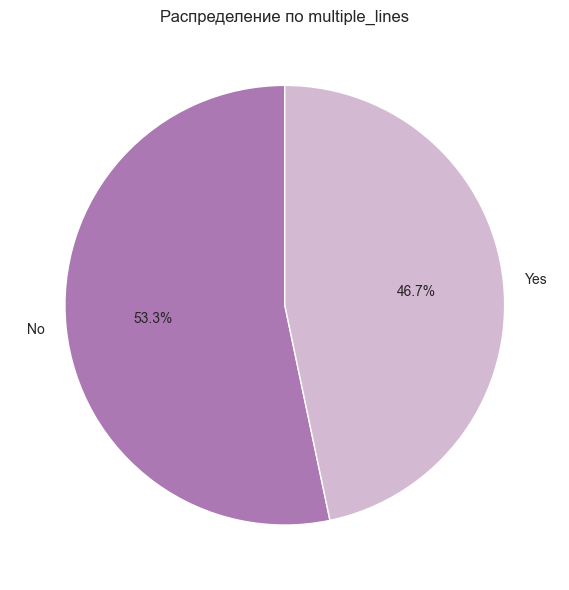


Описательная статистика:


,count,unique,top,freq
multiple_lines,6361,2,No,3390


In [27]:
visualize_data(phone_new.drop('customer_id', axis=1),
              cat_cols)

* `multiple_lines`
   - **Распределение:** `No` (53%), `Yes` (47%)
   - Признак `multiple_lines` может быть полезен для анализа того, насколько наличие нескольких линий связано с поведением клиентов.

**Вывод** 

* **Полезность признаков:** Большинство перечисленных признаков имеют потенциал для использования в моделях, так как они могут влиять на поведение и удержание клиентов.
* **Предварительная обработка:** Дата `begin_date` и `end_date` требуют преобразования, в новый признак.
* **Целесообразность включения:** Включение всех этих признаков в модели может улучшить качество прогнозов и понимание поведения клиентов.

Эти признаки помогут создать более точные и информативные модели для анализа и предсказания поведения клиентов.

Следует провести дальнейшую обработку данных и формирование новых признаков на основе временных данных и категориальных признаков для улучшения качества модели.

## Объединение данных

Объеденим датафреймы методом merge по ключу `customer_id` с использованием типа объединения `left join`, для присоединения всех датафреймов к датафрейму `contract_new`, в котором содержится информация о всех абонентах. При объединении, если абонент не пользовался услугами интернета или телефонии, то мы получим пропущенные значения в соответствующих признаках, позже заполним их заглушкой `Not used`

Проверим размерности датафреймов перед объединением:

In [28]:
for df in dfs:
    print(f'{df.name} {df.shape}')

contract_new (7043, 8)
personal_new (7043, 5)
internet_new (5517, 8)
phone_new (6361, 2)


Объеденим датафреймы в единый датафрейм `merged_df`:

In [29]:
# Объединим данные на основе столбца customer_id
merged_df = contract_new.merge(personal_new, on='customer_id', how='left')
merged_df = merged_df.merge(internet_new, on='customer_id', how='left')
merged_df = merged_df.merge(phone_new, on='customer_id', how='left')

merged_df.name = 'merged_df'

Проверим размерность объединённого датафрейма:

In [30]:
merged_df.shape

(7043, 20)

После объединения нескольких датафреймов по ключу `customer_id`, мы получили в итоговый датафрейм `merged_df` с 7043 строками и 20 столбцами.

## Исследовательский анализ и предобработка данных объединённого датафрейма

### Посмотрим общую информацию об объединённом датафрейме

In [31]:
# Проверим итоговый датафрейм
info_func(merged_df)

---------------------- Исходный датафрейм merged_df ----------------------


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No




------------ Общая информация о датафрейме merged_df ------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object       

None

---------- Количество пустых значений в датафрейме merged_df ----------




customer_id             0
begin_date              0
end_date             5942
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

---------- Количество явных дубликатов в датафрейме merged_df ----------


0

### Обработаем пропущенные значения

При объединении датафреймов мы получилили пропущенные значения в категориальных признаках, которые содержат информацию об использовании абонентом услуг, которые он не использовал, заполним их заглушкой `Not used`

Получим список категориальных признаков:

In [32]:
cat_cols_merged = merged_df.drop(
    ['customer_id'], axis=1).select_dtypes(include='object').columns.tolist()

Заполним пропуски в категориальных признаках значением `Not used`:

In [33]:
merged_df[cat_cols_merged] = merged_df[cat_cols_merged].fillna('Not used')

Выведем строки, в которых пропущены значения в `total_charges`:

In [34]:
merged_df[merged_df['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Not used
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,Not used,Not used,Not used,Not used,Not used,Not used,Not used,No
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,Not used,Not used,Not used,Not used,Not used,Not used,Not used,Yes
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Not used
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,Not used,Not used,Not used,Not used,Not used,Not used,Not used,No
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,Not used,Not used,Not used,Not used,Not used,Not used,Not used,Yes
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,Not used,Not used,Not used,Not used,Not used,Not used,Not used,No
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,Not used,Not used,Not used,Not used,Not used,Not used,Not used,No
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


Значения в `total_charges` пропущены для абонентов, которые зарегистрированы в день выгрузки данных `2020-02-01`, удалим эти строки:

In [35]:
# Количество строк до удаления пропусков
num_rows = merged_df.shape[0]

In [36]:
# Удаление строк с пропущенными значениями в 'total_charges'
merged_df = merged_df.dropna(subset=['total_charges'])

In [37]:
# Количество удаленных строк в процентах
percent_removed = (1 - merged_df.shape[0] / num_rows) * 100

# Выводим результат с округлением до двух знаков
print(f'Удалено {percent_removed:.2f}% данных')

Удалено 0.16% данных


Проверим, остались ли пропуски:

In [38]:
merged_df.isna().sum()

customer_id             0
begin_date              0
end_date             5931
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
multiple_lines          0
dtype: int64

Используем признак `end_date` для  создания новых, а потом удалим его вместе с `begin_date`.

### Создадим целевой признак - клиент разорвал контракт (`target`)

Создадим целевой признак по столбцу `end_date`: 1 - разорвал контракт и 0 - продолжает использовать услуги связи:

In [39]:
# Создаем столбец `target`
merged_df['target'] = merged_df['end_date'].apply(
    lambda x: 1 if pd.isna(x) else 0
)

Проверим целевой признак на дисбаланс классов:

In [40]:
merged_df['target'].value_counts(normalize=True)

target
1    0.84343
0    0.15657
Name: proportion, dtype: float64

Наблюдается дисбаланс классов в целевом признаке.

### Создадим признак - длительность контракта (`contract_duration`)

Создадим признак `contract_duration)`, путём вычисления разницы между `end_date` и `begin_date`, если абонент является действующим, то вместо `end_date` используем дату выгрузки данных `2020-02-01`:

In [41]:
# Задаем дату по умолчанию для случаев, когда end_date равно 'NO'
default_date = pd.to_datetime('2020-02-01')

# Создаем столбец `contract_duration` в днях
merged_df['contract_duration'] = merged_df.apply(
    lambda row: (default_date - row['begin_date']).days if pd.isna(row['end_date']) 
    else (row['end_date'] - row['begin_date']).days if pd.notna(row['end_date']) 
    else np.nan,
    axis=1
)

# Преобразуем `contract_duration` в целочисленный тип
merged_df['contract_duration'] = merged_df['contract_duration'].astype('int64')

### Создадим признак - cредний ежемесячный платеж ( `avg_monthly_charge`)

Создадим признак `avg_monthly_charge`, разделив общие расходы абонента на длительность контракта и умножив на среднее количество дней в месяце (29.5):

In [42]:
# Расчет среднего ежемесячного платежа
merged_df['avg_monthly_charge'] = merged_df['total_charges'] * (merged_df['contract_duration'] / 29.5)

# Преобразуем `avg_monthly_charge` в числовой тип (например, float)
merged_df['avg_monthly_charge'] = pd.to_numeric(merged_df['avg_monthly_charge'], errors='coerce')

### Создадим признак - количество используемых интернет услуг (`num_of_int_ser`)

Создадим список с интернет-услугами:

In [43]:
# Создаём список с интернет-услугами
int_ser_list = internet_new.drop('customer_id', axis=1).columns.tolist()
int_ser_list

['internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies']

Создадим признак `num_of_int_sernum_of_int_ser`:

In [44]:
merged_df['num_of_int_ser'] = merged_df[int_ser_list].apply(
    lambda row: row.map(lambda value: 1 if value not in ['No', 'Not used'] else 0),
    axis=1
).sum(axis=1)

### Удалим признаки-даты

Удалим признаки `begin_date`, `end_date`:

In [45]:
merged_df = merged_df.drop(['begin_date', 'end_date'], axis=1)

Проверим, какие признаки у нас остались и их типы данных:

In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         7032 non-null   object 
 1   type                7032 non-null   object 
 2   paperless_billing   7032 non-null   object 
 3   payment_method      7032 non-null   object 
 4   monthly_charges     7032 non-null   float64
 5   total_charges       7032 non-null   float64
 6   gender              7032 non-null   object 
 7   senior_citizen      7032 non-null   int64  
 8   partner             7032 non-null   object 
 9   dependents          7032 non-null   object 
 10  internet_service    7032 non-null   object 
 11  online_security     7032 non-null   object 
 12  online_backup       7032 non-null   object 
 13  device_protection   7032 non-null   object 
 14  tech_support        7032 non-null   object 
 15  streaming_tv        7032 non-null   object 
 16  streaming_m

### Построим графики с разрезом по целевомму признаку

In [47]:
# Обновим списки признаков
num_cols_merged = merged_df.select_dtypes(include=np.number).columns.tolist()
cat_cols_merged = merged_df.drop(['customer_id'], axis=1).select_dtypes(include='object').columns.tolist()

num_cols_merged.remove('senior_citizen')
num_cols_merged.remove('target')
cat_cols_merged.extend(['senior_citizen', 'target'])

In [48]:
cat_cols_merged

['type',
 'paperless_billing',
 'payment_method',
 'gender',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines',
 'senior_citizen',
 'target']

In [49]:
num_cols_merged

['monthly_charges',
 'total_charges',
 'contract_duration',
 'avg_monthly_charge',
 'num_of_int_ser']

Визуализируем распределение категориальных признаков в разрезе целевого признака:

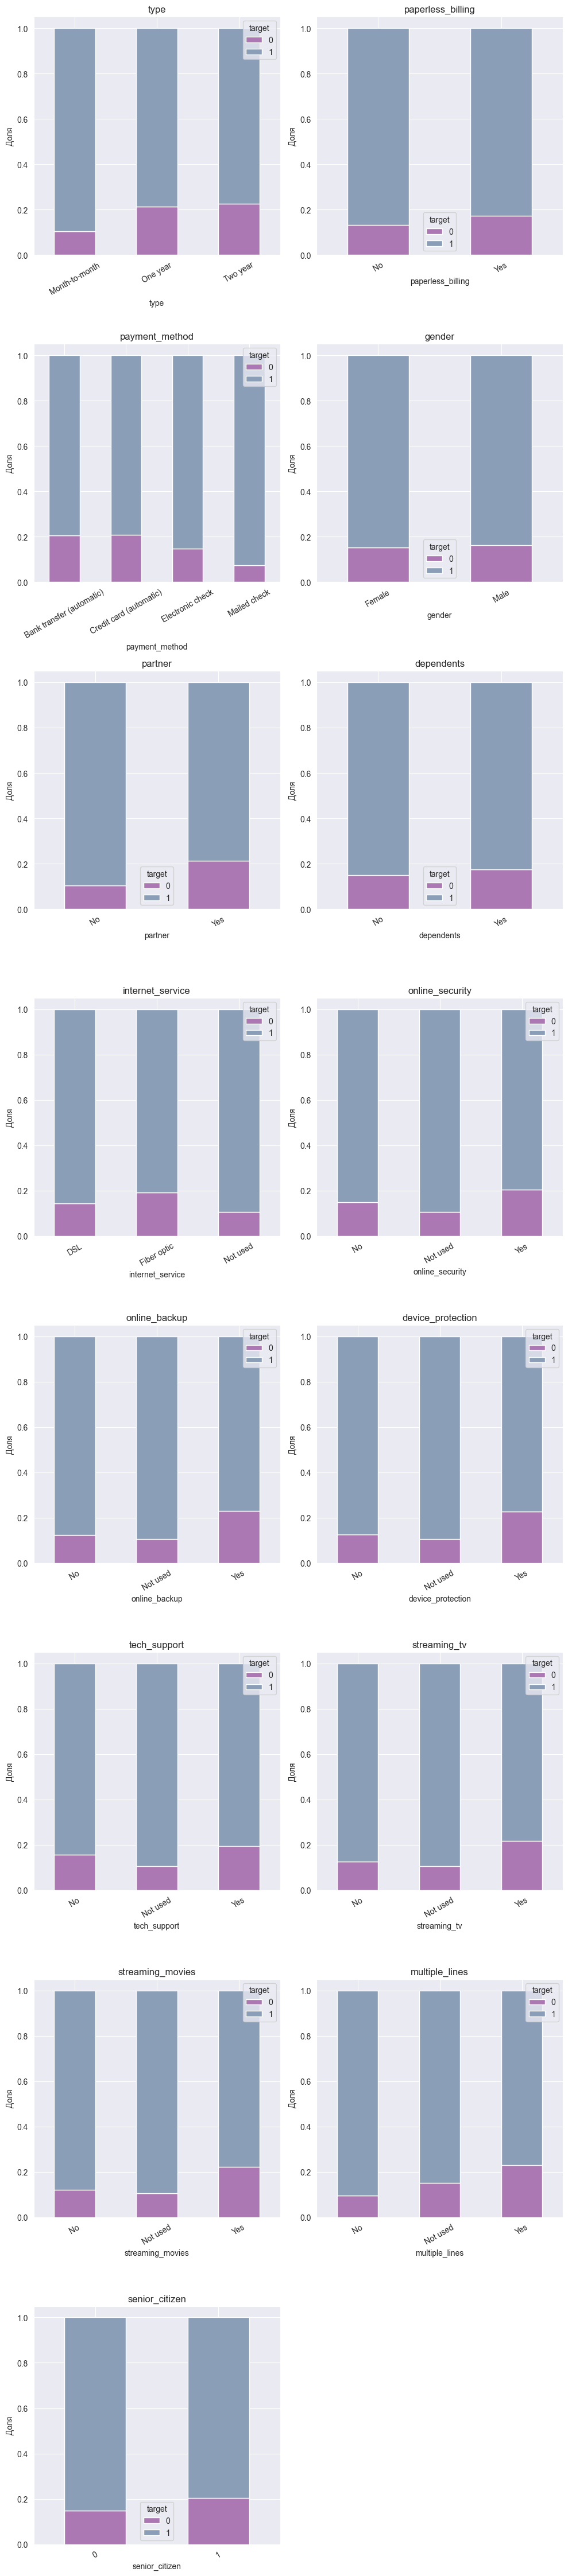

In [50]:
visualize_categorical(merged_df, cat_cols_merged, 'target')

Большинство абонентов, разорвавших контракт, ежемесячно оплачивают услуги связи и предпочитают использовать методы оплаты, такие как электронный чек или почтовый чек. Эти абоненты, как правило, холостые, не пользуются интернет-услугами и не подключены к нескольким телефонным линиям одновременно. Кроме того, большинство из них не являются пенсионерами.

Визуализируем распределение числовых признаков в разрезе целевого признака:

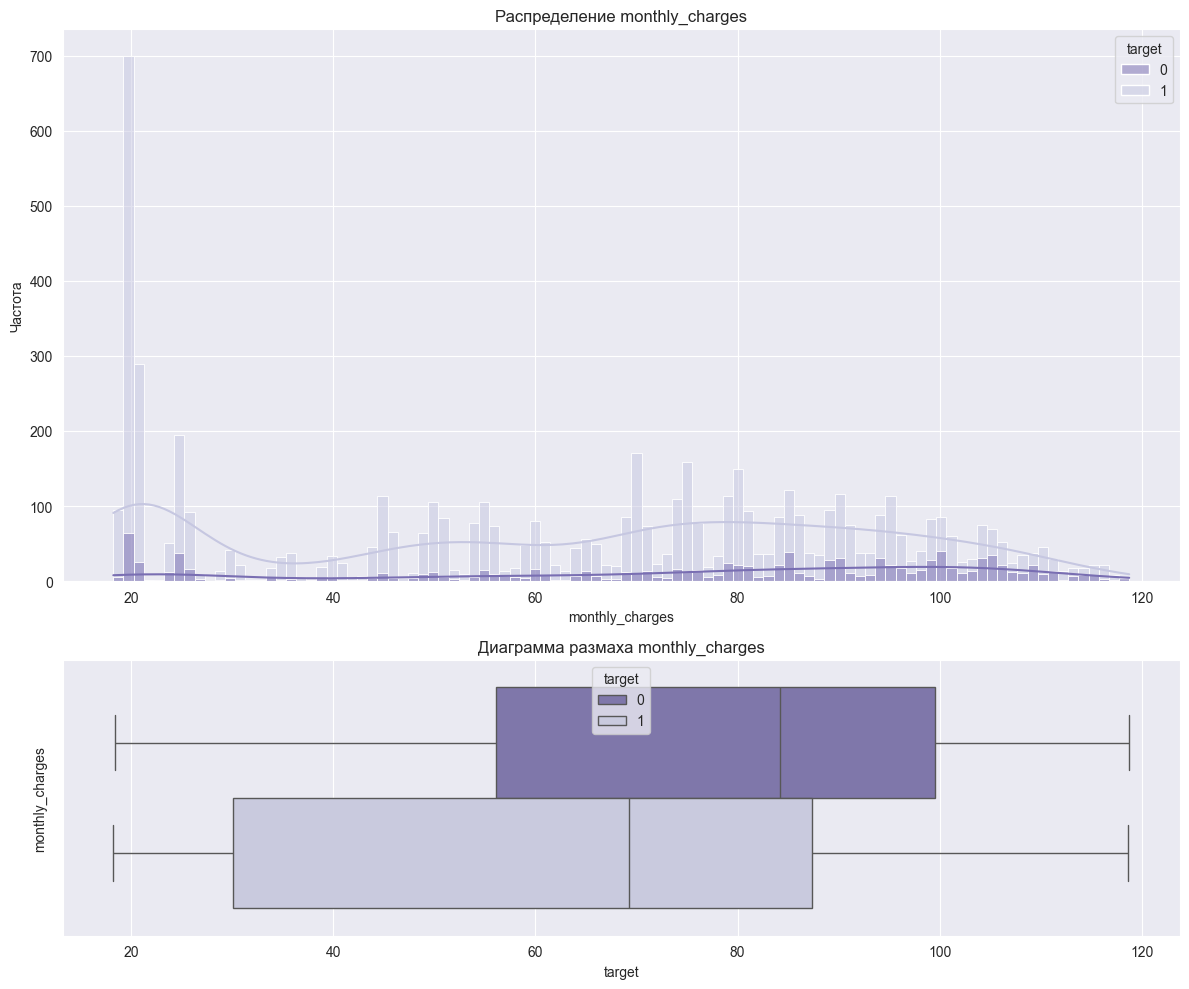

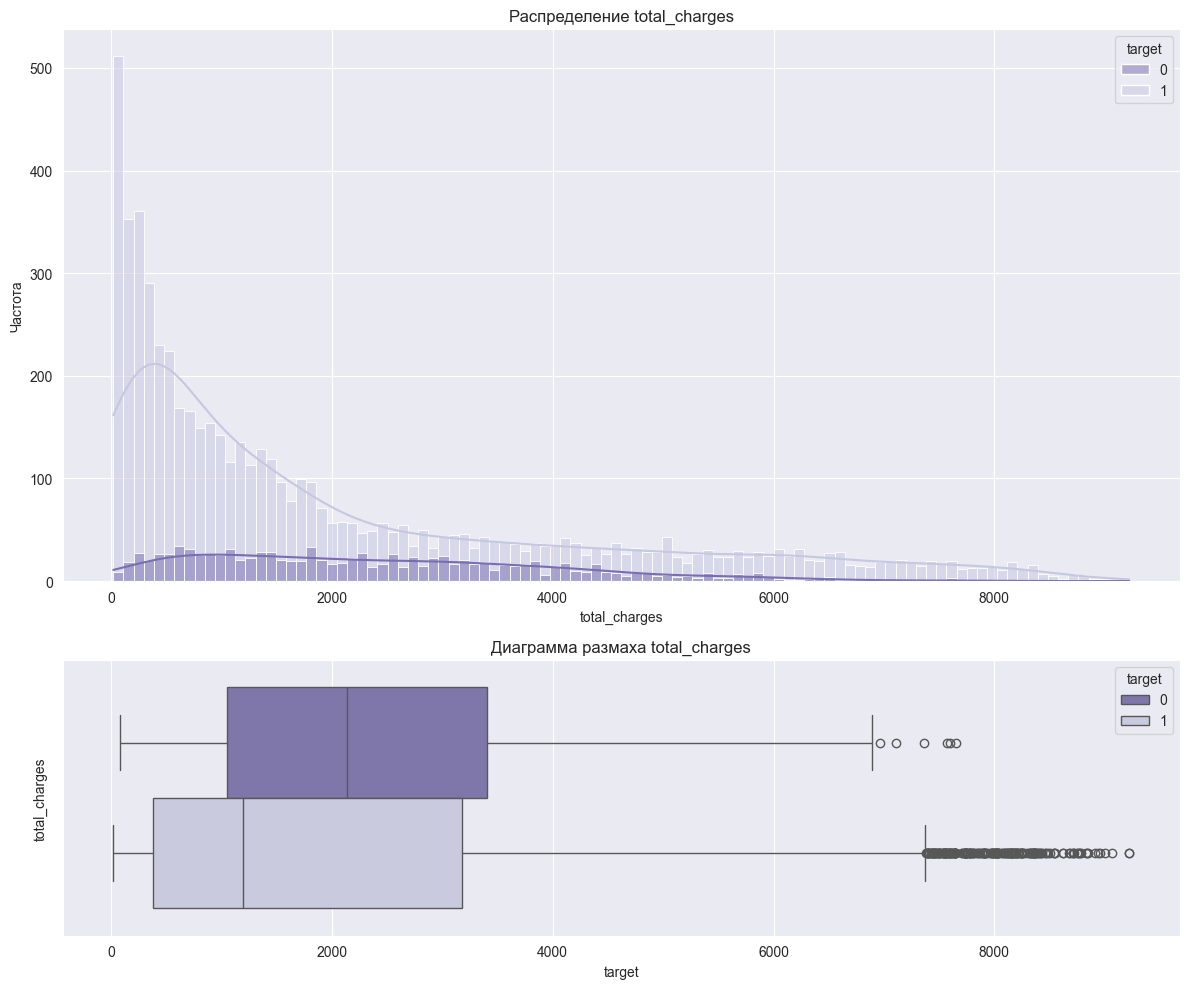

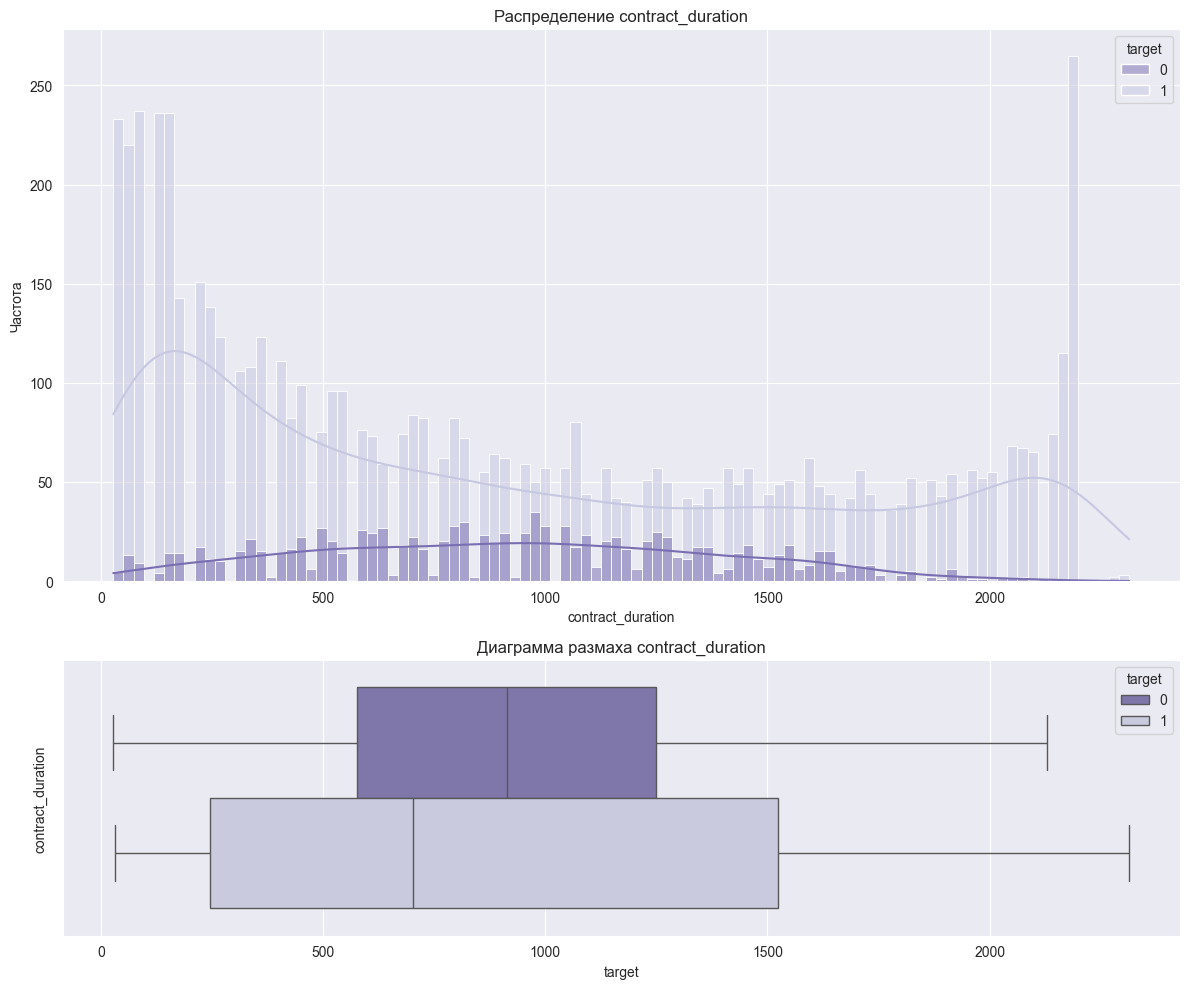

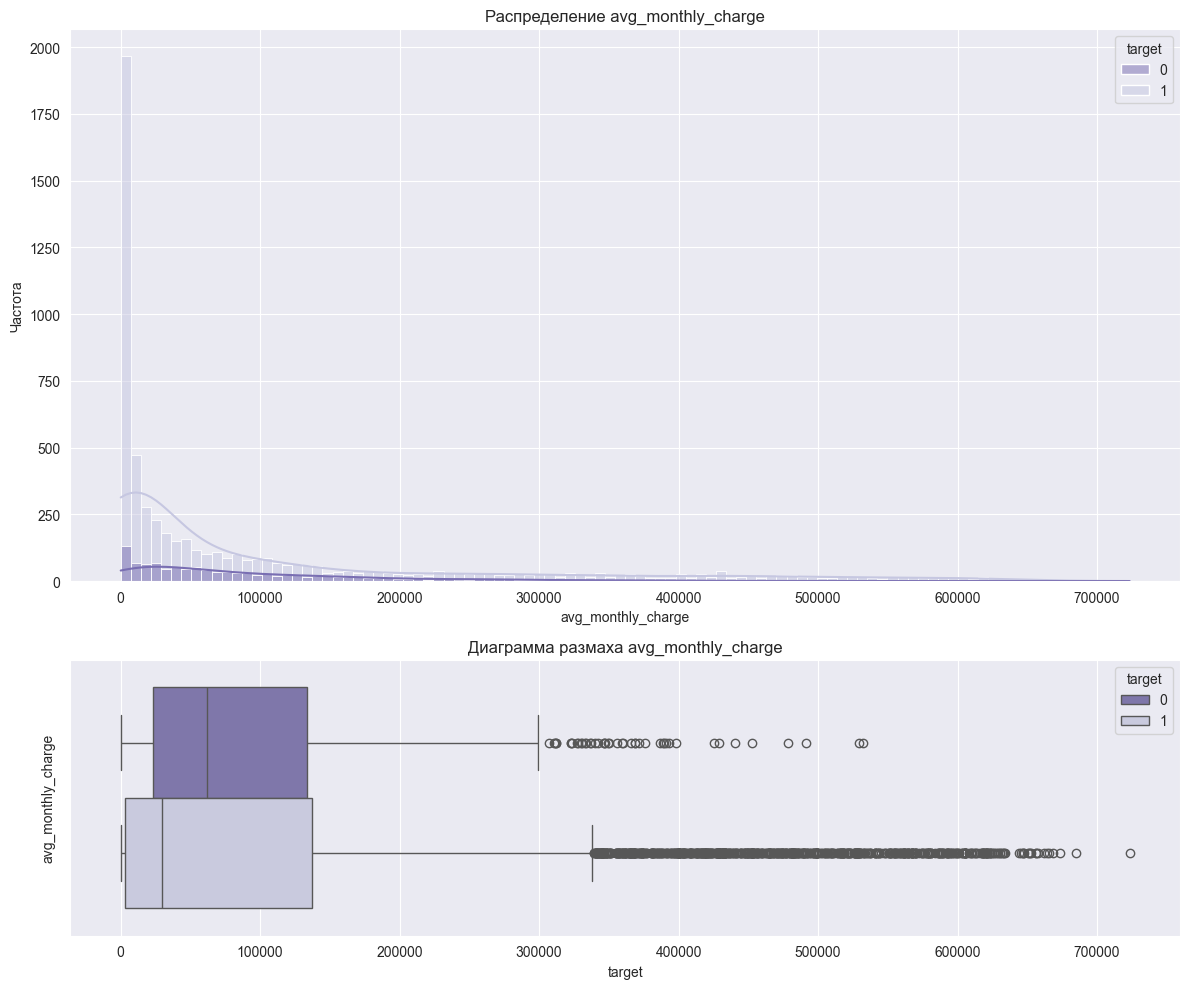

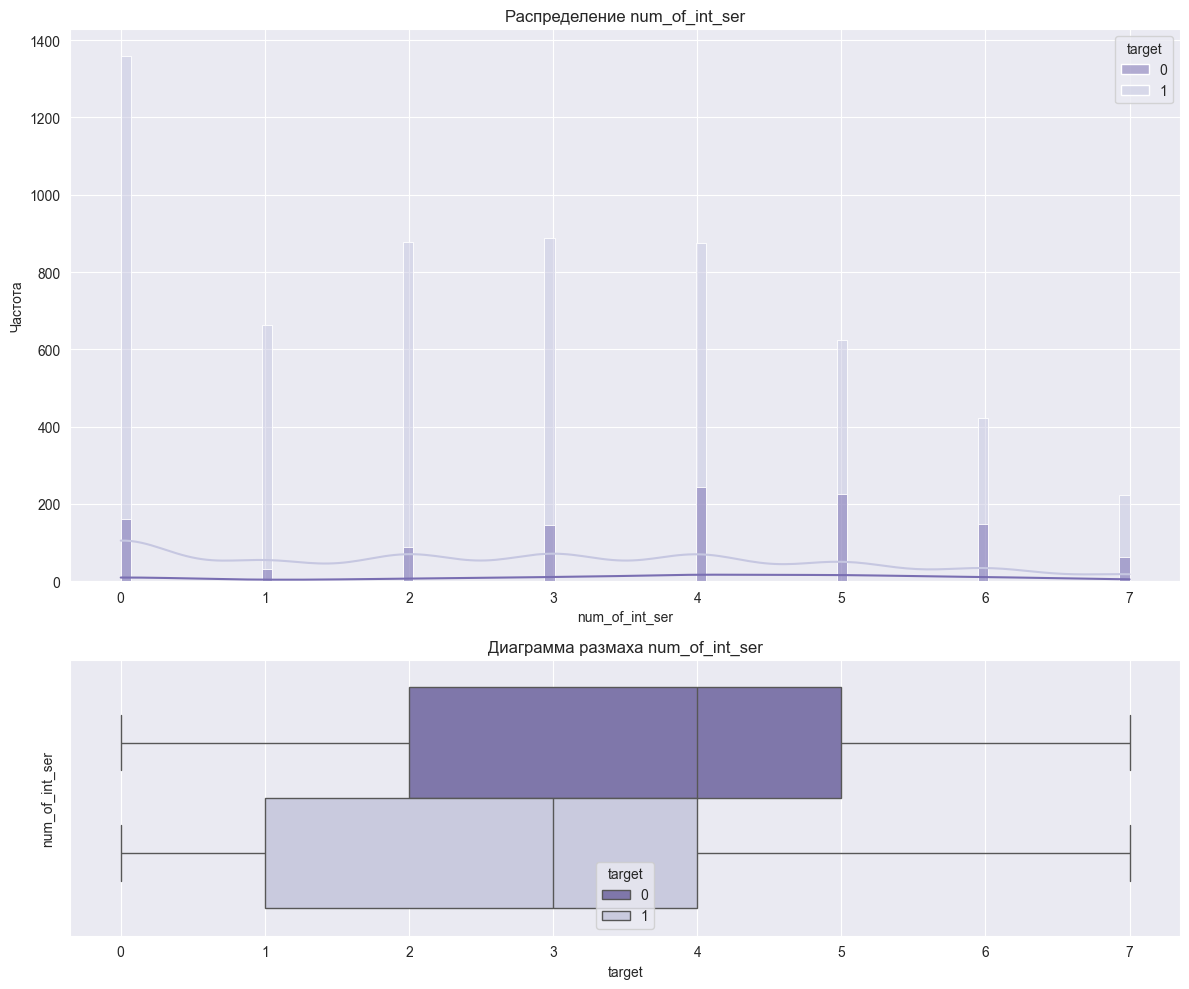

In [51]:
visualize_numerical(merged_df, num_cols_merged, 'target')

* **Ежемесячные платежи:**
   - Клиенты, не расторгнувшие контракт, в среднем платят больше за ежемесячные услуги связи, чем те, кто расторг контракт. Разброс значений в обеих группах схож, что указывает на одинаковую степень вариативности в ежемесячных платежах.
   - Графики показывают, что, хотя те, кто остаётся, обычно платят больше, диапазон платежей в обеих группах широк, и среди клиентов обеих категорий присутствуют разные уровни затрат.

* **Общие платежи:**
   - Общая сумма платежей за период у клиентов, которые продолжают пользоваться услугами, выше, чем у тех, кто расторг контракт. Однако разброс в группе, расторгнувшей контракт, значительно выше, что свидетельствует о большой вариативности среди этих клиентов.
   - Диаграммы демонстрируют, что клиенты, не расторгнувшие контракт, платят больше в общей сложности, но среди тех, кто расторг контракт, также есть клиенты с высокими общими платежами, что отражает неоднородность в их профиле потребления.

* **Длительность контракта:**
   - Клиенты, не расторгнувшие контракт, имеют несколько более долгий срок пользования услугами по контракту по сравнению с теми, кто отказался от услуг. Однако длительность контрактов среди тех, кто расторг контракт, более вариативна.
   - Графики показывают, что среди клиентов, расторгнувших контракт, есть как те, кто использовал услуги совсем недолго, так и те, кто пользовался ими довольно долго.

* **Средний ежемесячный платёж:**
   - Клиенты, продолжающие пользоваться услугами, в среднем платят больше каждый месяц по сравнению с теми, кто расторг контракт. Разброс значений по этому показателю в обеих группах схож, что указывает на одинаковую степень вариативности.
   - Диаграммы подтверждают, что клиенты, остающиеся с компанией, обычно платят больше ежемесячно, но распределение платёжных значений в обеих группах очень широкое, что говорит о разных уровнях потребления.
   
* **Количество используемых интернет-сервисов**
   - Клиенты, разорвавшие контракт, в среднем используют меньшее количество интернет-сервисов по сравнению с теми, кто остался с компанией. 
   - Графики показывают, что, хотя абоненты, оставшиеся с компанией, используют больше интернет-сервисов, существует значительное пересечение диапазонов использования сервисов между обеими группами.

Общая картина демонстрирует, что клиенты, остающиеся на обслуживании, как правило, платят больше и имеют более длительные контракты. Однако в обеих группах наблюдается широкий разброс по всем признакам, что указывает на разнообразие профилей клиентов и их потребностей.

### Рассчет Phik-матрицы корреляции

Рассчитаем корреляцию между признаками.

Создадим список с наименованиями непрерывных признаков:

In [52]:
con_columns = ['monthly_charges', 
               'total_charges', 
               'avg_monthly_charge', 
               'contract_duration']

Переведём `customer_id`  в индекс:

In [53]:
merged_df = merged_df.set_index('customer_id')

Проверим наличие дубликатов:

In [54]:
merged_df.duplicated().sum()

4

Удалим дубликаты:

In [55]:
merged_df = merged_df.drop_duplicates()

Повторим проверку на наличие дубликатов:

In [56]:
merged_df.duplicated().sum()

0

Вычислим Phik-матрицу корреляции:

In [57]:
phik_overview = merged_df.phik_matrix(interval_cols=con_columns)

Отобразим матрицу корреляции:

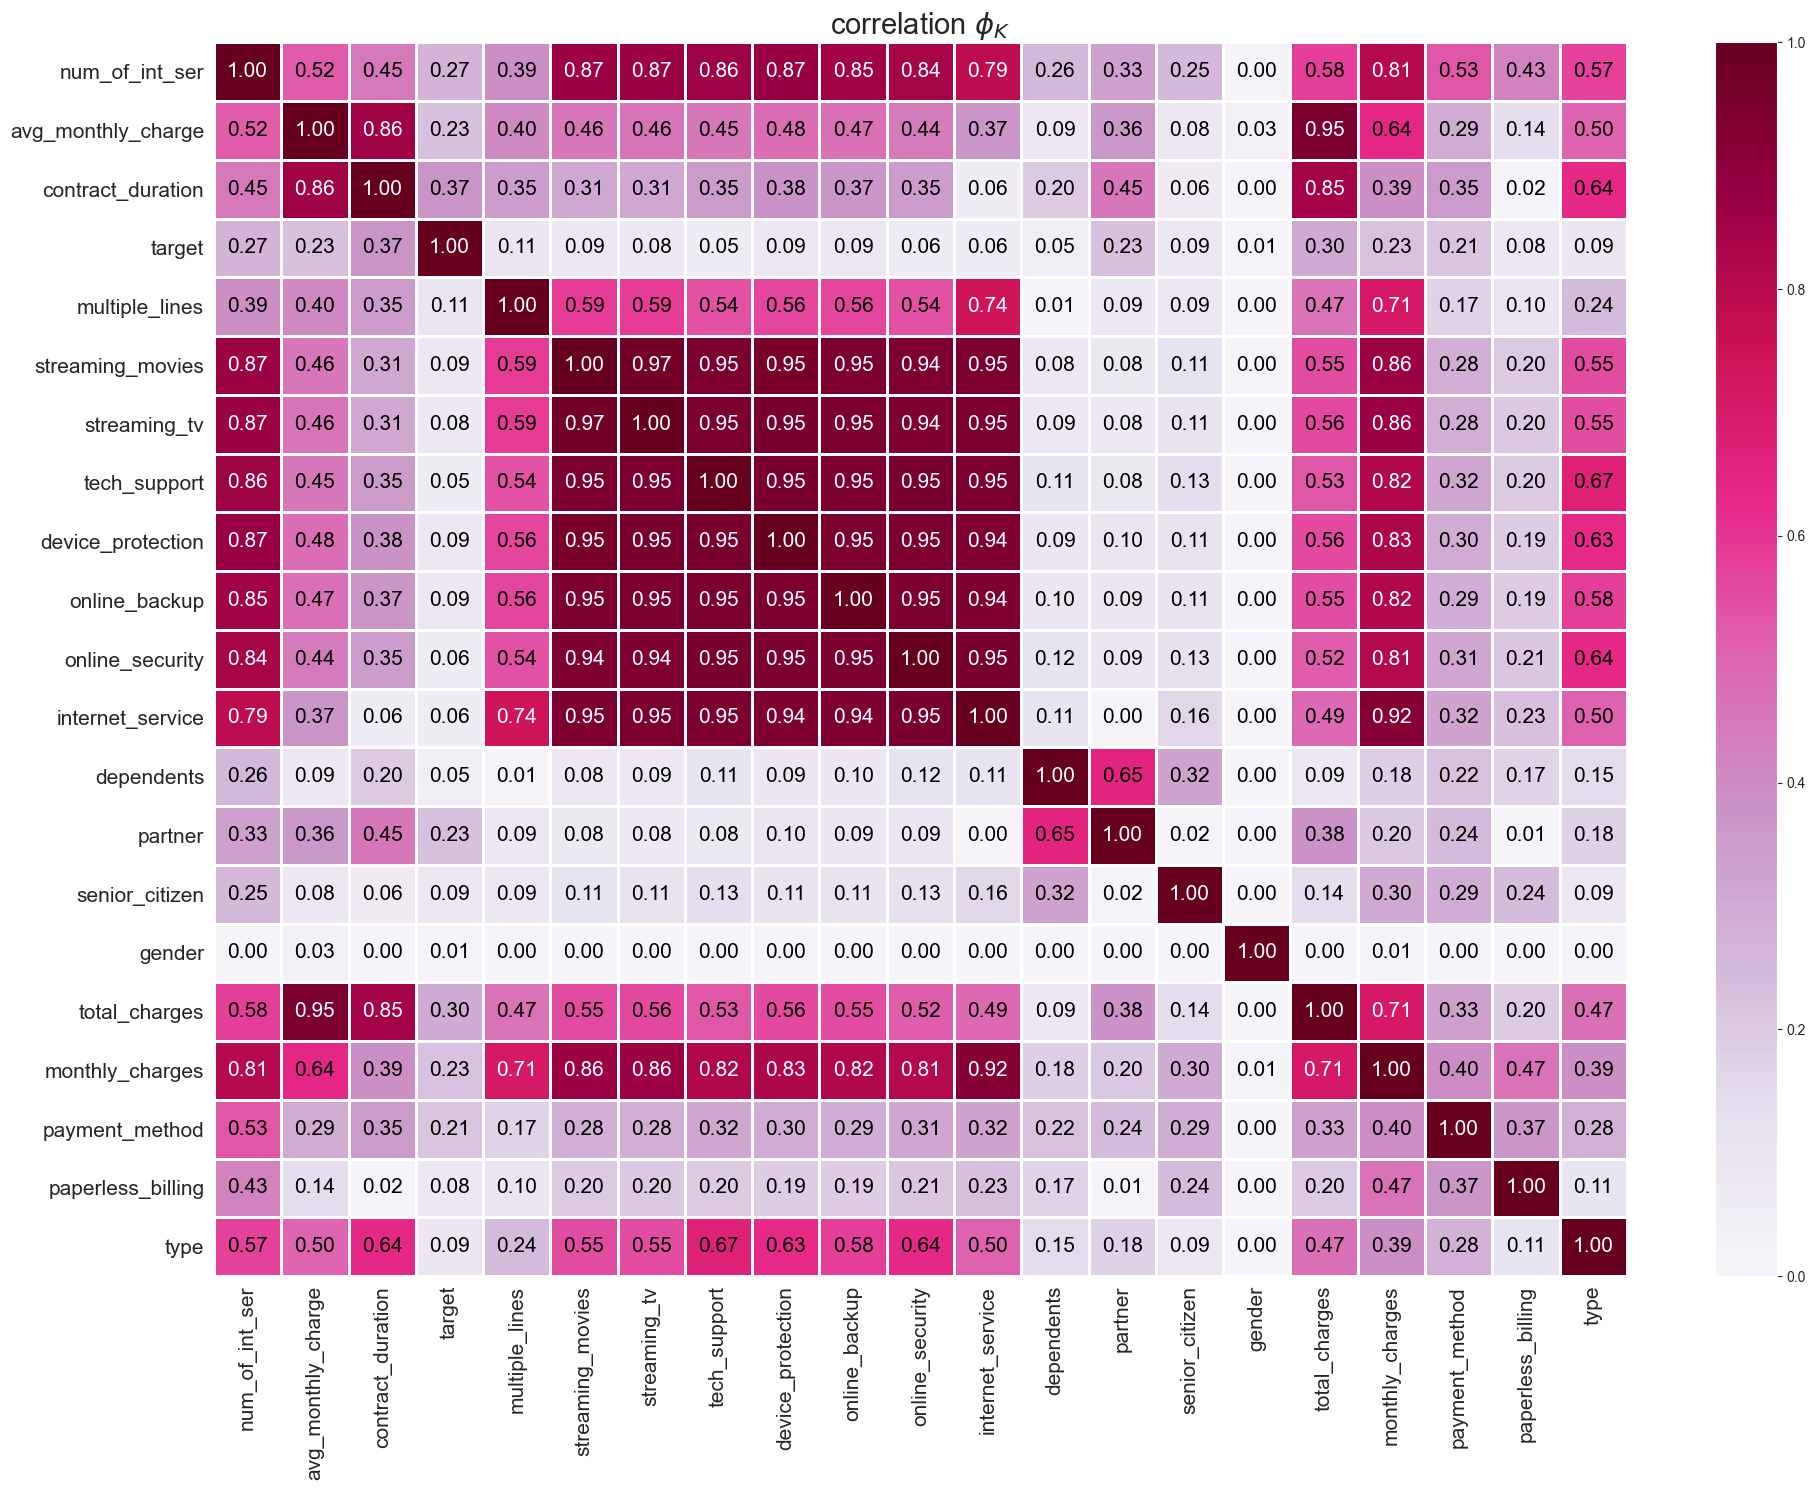

In [58]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='PuRd',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 
plt.show()

In [59]:
# Вывод списка признаков в матрице корреляции
print('Список признаков в матрице корреляции:\n')
for col in phik_overview.columns:
    print(col)

Список признаков в матрице корреляции:

type
paperless_billing
payment_method
monthly_charges
total_charges
gender
senior_citizen
partner
dependents
internet_service
online_security
online_backup
device_protection
tech_support
streaming_tv
streaming_movies
multiple_lines
target
contract_duration
avg_monthly_charge
num_of_int_ser


* **Корреляция с целевым признаком `target`:**
   - Целевой признак `target` имеет значительную положительную корреляцию с такими признаками, как `contract_duration` (0.86), `total_charges` (0.3), `num_of_int_ser` (0.27), `avg_monthly_charge` (0.23) и `monthly_charges` (0.23). Это указывает на то, что увеличение продолжительности контракта, общей суммы платежей, количества подключённых услуг, среднего ежемесячного платежа  и ежемесячного платежа положительно связано с вероятностью разрыва контракта.

* **Анализ мультиколлинеарности:**
   - Признаки `monthly_charges` и `total_charges` имеют высокую корреляцию (0.71), что может указывать на мультиколлинеарность. В этом случае может возникнуть проблема нестабильности модели и интерпретации коэффициентов.
   - Также наблюдаются высокие корреляции между признаками, связанными с интернет-услугами, такими как `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, и `streaming_movies`, что может указывать на наличие мультиколлинеарности в этой группе признаков. Например, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, и `streaming_movies` имеют корреляции выше 0.9 между собой.
   
Исключим из датафрейма интернет-признаки, а так же `monthly_charges` и `total_charges`:

In [60]:
merged_df = merged_df.drop(int_ser_list, axis=1)

In [61]:
merged_df = merged_df.drop(['monthly_charges', 'total_charges'], axis=1)

**Вывод**

- Мы обнаружили и обработали пропущенные значения:
     - Для категориальных данных мы заменили пропуски на `'No'`.
     - Удалили строки с пропущенными значениями в `total_charges`.
- Создали новые признаки:
     - `target`, который показывает, разорвал ли клиент контракт.
     - `contract_duration` для длительности контракта 
     - `avg_monthly_charge` для среднего ежемесячного платежа.
- Удалили признаки `begin_date`, `end_date`, `monthly_charges`, `total_charges`, `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`. 
- Корреляционный анализ показал:
  - Высокую положительную корреляцию `target` с `contract_duration` (0.86), `total_charges` (0.3), `num_of_int_ser` (0.27), `avg_monthly_charge` (0.23), `monthly_charges` (0.23).
  - Мультиколлинеарность между `monthly_charges` и `total_charges` (0.71) и среди интернет-признаков с корреляцией выше 0.9.

## Подготовка данных

### Разделение данных на обучающую и тестовую выборки

Разделим данные на обучающую и тестовую выборки:

In [62]:
# Подготовка данных
X = merged_df.drop(['target'], axis=1)
y = merged_df['target']

Посмотрим размерность этих датафремов:

In [63]:
merged_df.shape

(7028, 12)

In [64]:
X.shape

(7028, 11)

In [65]:
y.shape

(7028,)

Разделим данные на обучающую и тестовую выборки:

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE)

Зададим списки категориальных и числовых признаков:

In [67]:
num_columns = merged_df.drop(['target'], axis=1).select_dtypes(include=np.number).columns.tolist()
cat_columns = merged_df.select_dtypes(include='object').columns.tolist()

num_columns.remove('senior_citizen')
cat_columns.extend(['senior_citizen'])

Выведем их:

In [68]:
num_columns

['contract_duration', 'avg_monthly_charge', 'num_of_int_ser']

In [69]:
cat_columns

['type',
 'paperless_billing',
 'payment_method',
 'gender',
 'partner',
 'dependents',
 'multiple_lines',
 'senior_citizen']

Определим индексы категориальных признаков для модели CatBoost:

In [70]:
cat_feature_indices = [X.columns.get_loc(col) for col in cat_columns]

### Создадим пайплайны для преобразования признаков

####  категориальных признаков в бинарные

In [71]:
# Пайплайн для линейных моделей
ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

#### категориальных признаков в порядковые

In [72]:
# Пайплайн для деревьев решений и случайных лесов
ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

#### масштабирование числовых признаков 

In [73]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

### Создадим общие пайплайны для предобработки данных

In [74]:
# Объединённый пайплайн для линейных моделей
preprocessor_linear = ColumnTransformer([
    ('ohe', ohe_pipe, cat_columns),
    ('num', num_pipe, num_columns)
])

In [75]:
# Объединённый пайплайн для деревьев решений и случайных лесов
preprocessor_tree = ColumnTransformer([
    ('ord', ord_pipe, cat_columns),
    ('num', 'passthrough', num_columns)
])

## Обучение моделей машинного обучения

### Обучим модели

#### Логистическая регрессия

In [76]:
# Пайплайн
pipe_logistic = Pipeline([
    ('preprocessor', preprocessor_linear),
    ('model', LogisticRegression(random_state=RANDOM_STATE))
])

# Сетка параметров
param_grid_logistic = {
    'model__C': [0.01, 0.1, 1],
    'model__solver': ['liblinear', 'lbfgs']
}

# RandomizedSearchCV
search_logistic = RandomizedSearchCV(
    pipe_logistic, 
    param_distributions=param_grid_logistic, 
    cv=3, 
    scoring='roc_auc', 
    n_iter=6, 
    random_state=RANDOM_STATE, 
    n_jobs=-1
)

# Обучение
search_logistic.fit(X_train, y_train)

# Выводим
print('Логистическая регрессия:')
print(f'Лучшее значение ROC-AUC на кросс-валидации: {search_logistic.best_score_:.5f}')
print(f'Параметры лучшей модели: {search_logistic.best_params_}')

Логистическая регрессия:
Лучшее значение ROC-AUC на кросс-валидации: 0.78447
Параметры лучшей модели: {'model__solver': 'lbfgs', 'model__C': 1}


#### Дерево решений

In [77]:
# Пайплайн
pipe_tree = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

# Сетка параметров
param_grid_tree = {
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': range(2, 6),
    'model__min_samples_leaf': range(1, 4)
}

# RandomizedSearchCV
search_tree = RandomizedSearchCV(
    pipe_tree, 
    param_distributions=param_grid_tree, 
    cv=3, 
    scoring='roc_auc', 
    n_iter=10, 
    random_state=RANDOM_STATE, 
    n_jobs=-1
)

# Обучение
search_tree.fit(X_train, y_train)

print('Дерево решений:')
print(f'Лучшее значение ROC-AUC на кросс-валидации: {search_tree.best_score_:.5f}')
print(f'Параметры лучшей модели: {search_tree.best_params_}')

Дерево решений:
Лучшее значение ROC-AUC на кросс-валидации: 0.77426
Параметры лучшей модели: {'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_depth': 5}


#### Случайный лес

In [78]:
# Пайплайн
pipe_forest = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('model', RandomForestClassifier(random_state=RANDOM_STATE))
])

# Сетка параметров
param_grid_forest = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': range(5, 10),
    'model__min_samples_split': range(2, 6),
    'model__min_samples_leaf': range(1, 6)
}

# RandomizedSearchCV
search_forest = RandomizedSearchCV(
    pipe_forest, 
    param_distributions=param_grid_forest, 
    cv=3, 
    scoring='roc_auc', 
    n_iter=10, 
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Обучение
search_forest.fit(X_train, y_train)

print('Случайный лес:')
print(f'Лучшее значение ROC-AUC на кросс-валидации: {search_forest.best_score_:.5f}')
print(f'Параметры лучшей модели: {search_forest.best_params_}')

Случайный лес:
Лучшее значение ROC-AUC на кросс-валидации: 0.82251
Параметры лучшей модели: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 7}


#### Градиентный бустинг

In [79]:
# Пайплайн
pipe_gb = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('model', GradientBoostingClassifier(random_state=RANDOM_STATE))
])

# Сетка параметров
param_grid_gb = {
    'model__n_estimators': [600, 700, 800],
    'model__learning_rate': [0.1, 0.5, 0.75],
    'model__max_depth': [3, 5, 7]
}

# RandomizedSearchCV
search_gb = RandomizedSearchCV(
    pipe_gb, 
    param_distributions=param_grid_gb, 
    cv=3, scoring='roc_auc', 
    n_iter=10, 
    random_state=RANDOM_STATE, 
    n_jobs=-1
)

# Обучение
search_gb.fit(X_train, y_train)

print('Градиентный бустинг:')
print(f'Лучшее значение ROC-AUC на кросс-валидации: {search_gb.best_score_:.5f}')
print(f'Параметры лучшей модели: {search_gb.best_params_}')

Градиентный бустинг:
Лучшее значение ROC-AUC на кросс-валидации: 0.90759
Параметры лучшей модели: {'model__n_estimators': 800, 'model__max_depth': 3, 'model__learning_rate': 0.1}


#### CatBoost

In [80]:
# Пайплайн
pipe_catboost = Pipeline([
    ('preprocessor', 'passthrough'),
    ('model', CatBoostClassifier(random_state=RANDOM_STATE, verbose=0))
])

# Сетка параметров
param_grid_catboost = {
    'model__depth': [3, 5, 7],
    'model__iterations': [200, 300, 400],
    'model__learning_rate': [0.1, 0.5, 0.75],
    'model__cat_features': [cat_feature_indices]
}

# RandomizedSearchCV
search_catboost = RandomizedSearchCV(
    pipe_catboost, 
    param_distributions=param_grid_catboost, 
    cv=3, 
    scoring='roc_auc', 
    n_iter=10, 
    random_state=RANDOM_STATE, 
    n_jobs=-1)

# Обучение
search_catboost.fit(X_train, y_train)

print('CatBoost Classifier:')
print(f'Лучшее значение ROC-AUC на кросс-валидации: {search_catboost.best_score_:.5f}')
print(f'Параметры лучшей модели: {search_catboost.best_params_}')

CatBoost Classifier:
Лучшее значение ROC-AUC на кросс-валидации: 0.91103
Параметры лучшей модели: {'model__learning_rate': 0.5, 'model__iterations': 300, 'model__depth': 3, 'model__cat_features': [0, 1, 2, 3, 5, 6, 7, 4]}


#### DummyClassifier

In [81]:
### DummyClassifier
# Пайплайн
pipe_dummy = Pipeline([
    ('preprocessor', 'passthrough'),
    ('model', DummyClassifier(strategy='uniform'))
])

# RandomizedSearchCV без сетки параметров для DummyClassifier
search_dummy = RandomizedSearchCV(
    pipe_dummy, 
    param_distributions={}, 
    cv=3, 
    scoring='roc_auc', 
    n_iter=1, 
    random_state=RANDOM_STATE, 
    n_jobs=-1
)
# Обучение
search_dummy.fit(X_train, y_train)

print('Dummy Classifier:')
print(f'Лучшее значение ROC-AUC на кросс-валидации: {search_dummy.best_score_:.5f}')

Dummy Classifier:
Лучшее значение ROC-AUC на кросс-валидации: 0.50000


## Выбор лучшей модели

Выведем результаты обучения моделей:

In [82]:
# Создание списка с результатами всех моделей и названиями моделей
results = [
    (search_logistic.cv_results_, 'Logistic Regression'),
    (search_tree.cv_results_, 'Decision Tree'),
    (search_forest.cv_results_, 'Random Forest'),
    (search_gb.cv_results_, 'Gradient Boosting'),
    (search_catboost.cv_results_, 'CatBoost'),
    (search_dummy.cv_results_, 'Dummy Classifier')
]

# Создаем пустой DataFrame
randomized_search_results = pd.DataFrame()

# Проходим по всем результатам и добавляем их в DataFrame
for cv_result, model_name in results:
    # Преобразуем cv_results_ в DataFrame
    temp_df = pd.DataFrame(cv_result)
    
    # Добавляем колонку с названием модели
    temp_df['model'] = model_name
    
    # Объединяем результаты в один DataFrame
    randomized_search_results = pd.concat([randomized_search_results, temp_df], ignore_index=True)

randomized_search_results_scorer = randomized_search_results.sort_values(by=['mean_test_score'], ascending=False)    
    
# Выводим итоговый DataFrame
display(randomized_search_results_scorer[['model', 'params', 'mean_test_score', 'mean_score_time']].head(10))

,model,params,mean_test_score,mean_score_time
41,CatBoost,"{'model__learning_rate': 0.5, 'model__iteratio...",0.911027,0.026989
40,CatBoost,"{'model__learning_rate': 0.5, 'model__iteratio...",0.910387,0.017050
32,Gradient Boosting,"{'model__n_estimators': 800, 'model__max_depth...",0.907594,0.055550
42,CatBoost,"{'model__learning_rate': 0.75, 'model__iterati...",0.906473,0.040336
33,Gradient Boosting,"{'model__n_estimators': 800, 'model__max_depth...",0.903645,0.051867
35,Gradient Boosting,"{'model__n_estimators': 700, 'model__max_depth...",0.903249,0.050722
27,Gradient Boosting,"{'model__n_estimators': 600, 'model__max_depth...",0.902444,0.043080
31,Gradient Boosting,"{'model__n_estimators': 700, 'model__max_depth...",0.895992,0.074465
45,CatBoost,"{'model__learning_rate': 0.5, 'model__iteratio...",0.895732,0.030588
36,CatBoost,"{'model__learning_rate': 0.5, 'model__iteratio...",0.894961,0.020475


На основе этих данных, лучшей моделью является `CatBoost`, которая показала наивысшее значение метрики `ROC-AUC` на кросс-валидации. Наилучшие результаты были достигнуты при параметрах `model_iterations = 400`, `max_depth = 3`, `model_learning_rate: 0.5` и `model_cat_features': [0, 1, 2, 3, 5, 6, 7, 4]` с метрикой `ROC-AUC` около 0.91.

Посчитаем значение метрики `ROC-AUC` на тестовой выборке:

In [83]:
# Градиентный бустинг
best_model = search_catboost.best_estimator_
# Получение вероятностей для положительного класса
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [84]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC на тестовой выборке: {roc_auc:.5f}')

ROC-AUC на тестовой выборке: 0.93590


Построим `ROC-кривую` для лучшей модели:

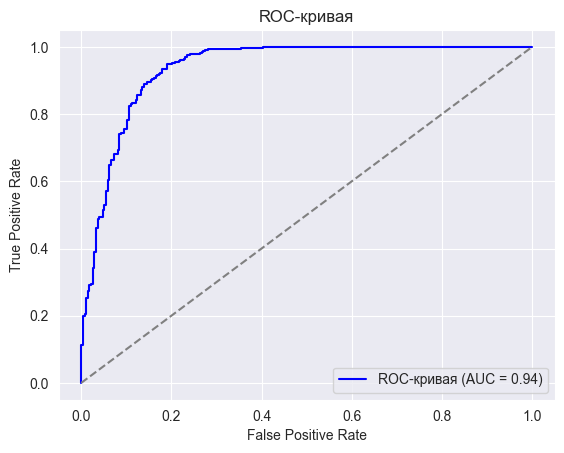

In [85]:
# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

Значение `ROC-AUC` на тестовой выборке составляет **0.93590**, что указывает на хорошую способность модели различать положительные и отрицательные классы. `ROC-AUC` близкий к 1 свидетельствует о высоком качестве модели в предсказании классов.

Посчитаем `Accuracy` на тестовой выборке:

In [86]:
# Accuracy на тестовых данных
accuracy_test = best_model.score(X_test, y_test)
print(f'Accuracy на тестовой выборке: {accuracy_test:.5f}')

Accuracy на тестовой выборке: 0.95048


Значение `Accuracy` на тестовой выборке составляет **0.95048**, что также свидетельствует о высоком качестве модели. Это означает, что модель правильно классифицировала около 95% всех тестовых примеров.

Построим матрицу ошибок:

Матрица ошибок:


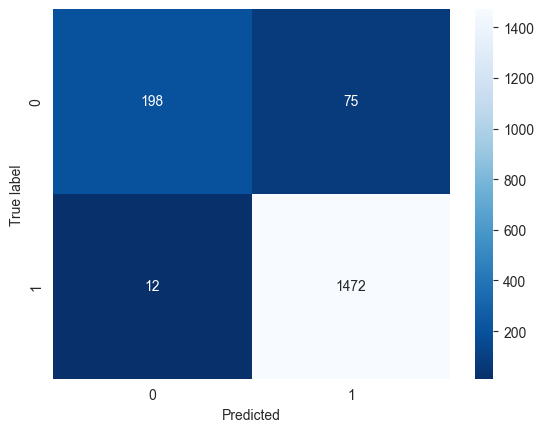

In [87]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))
print('Матрица ошибок:')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

* **True Positives (TP)**: 1472 — количество правильных предсказаний положительного класса.
* **False Positives (FP)**: 75 — количество неправильных предсказаний положительного класса.
* **True Negatives (TN)**: 198 — количество правильных предсказаний отрицательного класса.
* **False Negatives (FN)**: 12 — количество неправильных предсказаний отрицательного класса.

Модель `CatBoost` демонстрирует хорошие результаты как по метрикам точности, так и по метрикам полноты и `AUC`, что делает её эффективной для нашей задачи классификации.

Проведём анализ важности признаков:

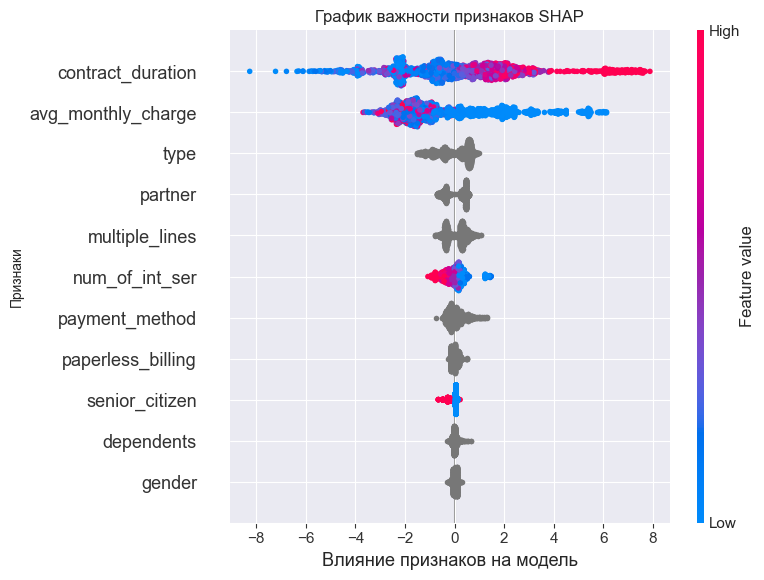

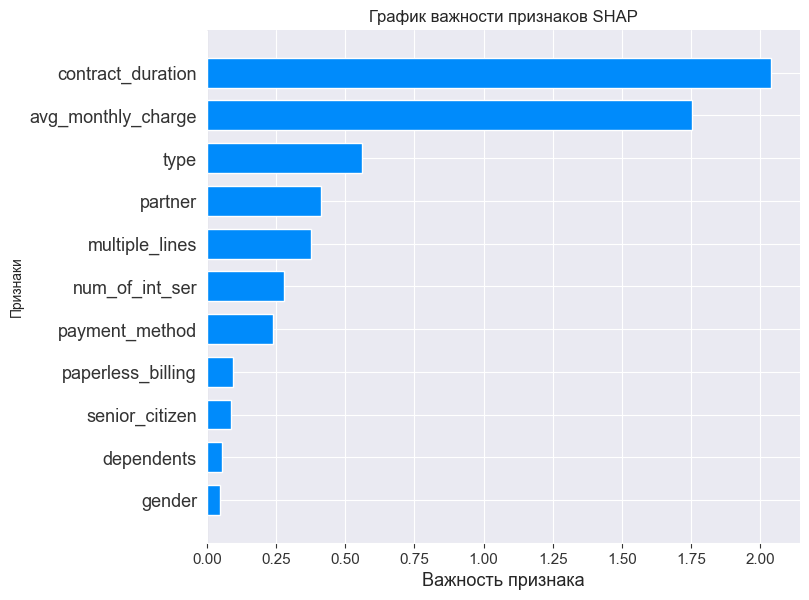

In [88]:
# Получаем модель CatBoost из пайплайна
catboost_model = search_catboost.best_estimator_.named_steps['model']

# Получаем данные тестового набора
X_test_processed = X_test.copy()  # Если данные уже подготовлены

# Создаем SHAP Explainer для модели CatBoost
explainer = shap.Explainer(catboost_model)

# Получаем SHAP значения
shap_values = explainer(X_test_processed)

# Строим график SHAP значений
shap.summary_plot(shap_values, X_test_processed, show=False)

# Добавляем заголовок и подписи осей
plt.title('График важности признаков SHAP')
plt.xlabel('Влияние признаков на модель')
plt.ylabel('Признаки')
plt.tight_layout()  
plt.show()

# Построение графика важности признаков в виде столбчатой диаграммы
shap.summary_plot(shap_values, X_test_processed, plot_type="bar", show=False)

# Добавление подписей к осям и заголовка графика
plt.xlabel('Важность признака')  
plt.ylabel('Признаки')    
plt.title('График важности признаков SHAP')  
plt.show()

Более важными признаками для модели оказались: длительность контракта, среднемесячные расходы, тип оплаты, наличие супруга(и), подключение телефона к нескольким линиям одновременно, количество подключённых интренет-услуг, тип платежа.

## Общий вывод и рекомендации заказчику

###### **Основные этапы работы:**


   - **Загрузка и подготовка данных**:
     - Данные были загружены из датасетов `contract_new`, `personal_new`, `internet_new`, `phone_new` в формате CSV.
     - Выполнен первичный анализ данных, включающий проверку на пропуски, дублирование.

   - **Исследовательский анализ данных**:
     - Проведен детальный анализ распределений и взаимосвязей между признаками.
     - Обнаружены и обработаны пропуски в данных. В категориальных признаках пропуски заполнены заглушкой `Not used`, в числовых признаках обработаны согласно указанным критериям.
     - Проведена предобработка данных: создание новых признаков, удаление высококоррелированных и неинформативных признаков.

   - **Подготовка данных**:
     - Разделение данных на обучающую и тестовую выборки.
     - Создание пайплайнов для обработки категориальных и числовых признаков в зависимости от типа модели.
     - Использование `ColumnTransformer` для объединенной предобработки данных.

   - **Обучение моделей**:
     - Обучены несколько моделей машинного обучения:
       - `Логистическая регрессия`
       - `Дерево решений`
       - `Случайный лес`
       - `Градиентный бустинг`
       - `CatBoost`
       - `DummyClassifier` (для базового сравнения)
     - Использован `RandomizedSearchCV` для подбора оптимальных гиперпараметров.

   - **Оценка моделей**:
     - Проведена оценка моделей с использованием метрики `ROC-AUC` на кросс-валидации и тестовой выборке.
     - Лучшие результаты показал `CatBoost` с `ROC-AUC` = 0.911027 на кросс-валидации. На тестовой выборке модель достигла `ROC-AUC` = 0.9359 и `Accuracy` = 0.95048.
     - Построена матрица ошибок, показывающая высокую точность и полноту модели.
     - Выполнен `SHAP-анализ` для интерпретации важности признаков.
     

###### **Полученные результаты:**

- **`CatBoost`** продемонстрировал наилучшие результаты с `ROC-AUC` около 0.91 на кросс-валидации и около 0.94 на тестовой выборке. 
- Параметры лучшей модели:
   - `iterations = 400`
   - `depth = 3`
   - `learning_rate = 0.5`
   - `cat_features = [0, 1, 2, 3, 5, 6, 7, 4]`. 
- Модель хорошо справляется с задачей классификации, показывая высокую способность точно различать положительные и отрицательные классы.
- Основные важные признаки для модели включают длительность контракта, среднемесячные расходы, тип оплаты, и другие.


###### **Рекомендации для бизнеса:**

   - **Фокус на ключевых признаках**: Основные признаки, такие как длительность контракта и среднемесячные расходы, имеют значительное влияние на модель. Рекомендуется акцентировать внимание на этих признаках при разработке стратегий и предложений для клиентов.

   - **Использование модели для улучшения клиентского сервиса**: Модель может быть использована для прогнозирования вероятности ухода клиентов, что позволит предпринять меры по удержанию клиентов и повышению удовлетворенности.

   - **Инвестиции в дальнейшее развитие модели**: Продолжить улучшение модели, например, рассмотрев возможность использования дополнительных признаков или более сложных методов обработки данных.

   - **Регулярное обновление модели**: Модель должна быть регулярно обновляемой на новых данных, чтобы поддерживать её актуальность и точность в изменяющихся условиях рынка.

Эти шаги помогут оптимизировать бизнес-процессы, улучшить клиентский опыт и повысить общую эффективность стратегии компании.